# BABS 507 Project (Period 1 2022)
#### Instructor: Martha Essak

Replace all sections that are highlighted with your answers and remove the highlighting by deleting the code style. **Add markdown and code cells as needed to complete your project.** Please do not modify the headings of the sections.

Helpful notes abouts markdown in Jupyter to get you started:
* When you have a cell selected (by clicking on the white space to the left of the cell) in Command mode (blue box around the cell), press `a` or `b` to add a cell "above" or "below"
* In Command mode, press `d` twice to delete the cell. Press z to undo deleting a cell
* In Command mode, press `m` to change a code cell to a markdown cell, or press `y` to change a markdown cell to a code cell
* In Command mode, press `x` to cut cell, `c` to copy cell, and `v` to paste cell below the selected cell
  
* Double click a cell to enter Edit mode (green box around the cell), or press `Enter`
* Add two empty spaces at the end of a line to add a line break
* Press `shift + enter` to execute a cell to see either the formatted version (for a markdown cell) or to run the code (for a code cell). This will cause you to leave edit mode.
* Press `Ctrl + Shift + -` to split the current cell into two cells where the cursor is
* Press `Shift + m` to merge multiple cells. You can use `Shift + up arrow` or `Shift + down` arrow to select multiple cells.



[See cheat sheet for Markdown in Jupyter for more details](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)

##### Names of students:
Yutong Luo (59033662)  
Haichao Sun (25089153) 
</code> 

---

## Table of Contents
[Project description](#Description)  
[Introduction](#Introduction)  
[Exploratory Data Analysis](#EDA)  
[Model fit to training data, checking assumptions](#Model_fit)  
[Hypothesis tests](#Hyp_tests)  
[Using the model for prediction](#Prediction)  
[Comparing to other candidate models](#Compare) 
[Discussion](#Discussion)


[Visualizing appropriate transformations](#Transformations)  
[Other candidate models](#Other_models)

---

<a id="Description"></a>
## Project description

You will develop a multiple linear regression model to predict sale price of houses (\\$ CAD) in Vancouver using the following potential candidate quantitative variables:  
- Days on market (days)
- Total floor area (square feet)
- Age (years); this is calculated from Year Built so you do not need to use Year Built
- Lot Size (square feet)

The data was collected from detached homes with sale prices of at most \\$3 million in 2019 and early 2020, prior to any impacts of the pandemic on the real estate market in Vancouver.  Note that because we are excluding all houses with prices over \\$3 million, the data may appear truncated.  

Assume that we are trying to predict sale price for the same time period that the data was collected. Consider how predicting sale price could be valuable for realtors representing both house sellers and house buyers.  

### Methods  
  
First, you will divide the dataset into a training set and a validation set. You will use the training set to develop your model. You can transform variables as appropriate. Note that if you transform age using a power transformation or a log transformation, you should add 1 year to all the values of age first.   
  
You will conduct exploratory data analysis, visualizing the relationships between the variables. You should include code for visualizing appropriate transformations at the end of the project.  

In the main part of the project, you will present the results of your best model (referred to as the final model), which you will choose by considering the following:
- checking assumptions are met
- assessing goodness of fit to the training set
- considering the variables and complexity of the model
- assessing how well the model predicts new data (using the validation set as new data)

Before creating any models, you should consider is the objective and which variables you would have access to when attempting to use the model to create predictions.

At the end of the project, you should include code for any other candidate models that you considered. 
  
You will discuss the strengths and limitations of your final model, and provide any recommendations to address the limitations.

---

### Make sure that your code is organized. Includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (1 mark)
---

<a id="Introduction"></a>
# Introduction (300 words max.) (2.5 marks) - Part A 

What to include: objective and purpose of the analysis, background information, and the benefit of having and using a model to accurately predict price.  
  
If you include any references, please put the bibliographical information (APA style) at the end of your introduction; this does not contribute to the word count.
</code> 

---

    The Vancouver real estate market was down for the first half year of 2019, but recovered for the second half of 2019, which brought an upward trend to the estate market trend in 2020. This project aims to analyze the data from Vancouver in 2019 and early 2020 on detached homes(excludes house prices over $3 million). Excluding the impact of Covid, the data would be valuable in a post-pandemic era. 

    By creating this multiple linear regression model, we are trying to predict the sale price of houses in Vancouver based on the data for 2019 and early 2020. The purpose of the analysis is to help us understand how certain variables, such as Days on market, Total floor area, Age, and Lot Size, would impact house selling prices in Vancouver in 2019 and early 2020. The benefit of having and using a model to accurately predict the price is that, by plotting the graphs, the relationships between variables are visualized and identified. The dataset will be divided into a training set and a validation set. With the lowess line, it is obvious for us to identify the relationships between the variables with the general trend and flow between them, it also makes the outliers easy to define. Afterward, we would use the validation set to conduct a hypothesis test to generate the significance of the test.

    The analysis would be a great tool to help realtors predict the upcoming estate market trends from both the buyers' side and the sellers' side. Realtors could also use this information to increase their personal sales performance, and help their clients learn how different factors would impact on buying or selling houses, as well as give advice on what would be a good timing/price to buy or sell.



    Reference

    Find your property assessment. (n.d.). BC Assessment. Retrieved September 27, 2022, from https://www.bcassessment.ca/?sp=1&act=

    Little, S. (2020, January 13). 2019 saw British Columbia home sales, prices dip: BC Real Estate Association. Global News. Retrieved September 27, 2022, from https://globalnews.ca/news/6405341/2019-british-columbia-home-sales-prices-bcrea/ 

    Stigmatized Properties and Other Noteworthy Homes in British Columbia. (n.d.). HouseCreep. Retrieved September 27, 2022, from British Columbia, Canada | Stigmatized Properties and Noteworthy Homes | Housecreep


In [1]:
# Import the data:
mydata <- read.csv(file="C:/Users/sunhc/Desktop/MBAN/BABS507/project/House sale data Vancouver.csv", header=TRUE)

---
*The dataset includes the following variables:*
- Number: if your observations get out of order, please sort by Number to get them back in the correct order so that everyone will work with the same training set and validation set.
- Address: Address of the house.
- List.Date: The date that the house was listed for sale.
- Price: The final sale price of the house (\\$ CAD). Note that this may differ from what the original asking price was.
- Days.on.market: how many days the house was on the market before it sold.
- Total.floor.area: the total area in square feet of the finished living space, including kitchen, bathrooms, living room, bedrooms, etc. on all floors of the house
- Year.Built: the year when the house was built.
- Age: calculated from Year.Built to represent the house age around the time of sale.
- Lot.size: the size of the lot in square feet. This includes the area of the footprint of the house, and the area of any yard or garden.
---

In [2]:
# Create a training set and a validation set using the following code
# This will divide the dataset into ~80% training set (1042 observations)
# and ~ 20% validation set (260 observations)

mydata.train <- mydata[1:1042,]
mydata.valid <- mydata[1043:nrow(mydata),]

---
<a id="EDA"></a>
# Exploratory data analysis (4 marks) - Part A

</code> 


In [3]:
#To have an overview of the dataset, and to make the data as strings.
head(mydata)
mydata <- as.data.frame(unclass(mydata), stringsAsFactors = TRUE)

,Number,Address,List.Date,Price,Days_on_market,Total_floor_area,Year_Built,Age,Lot_Size
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,3178 GRAVELEY STREET,5/8/2020,1500000,18,2447,1946,74,5674.00
2,2,1438 E 28TH AVENUE,1/22/2020,1300000,7,2146,1982,38,3631.98
3,3,2831 W 49TH AVENUE,6/18/2019,2650000,1,3108,1929,90,9111.00
4,4,2645 TRIUMPH STREET,6/18/2019,1385000,28,2602,1922,97,4022.70
5,5,741-743 E 10TH AVENUE,11/28/2019,1590000,17,1843,1970,49,4026.00
6,6,86 W 21ST AVENUE,3/3/2020,2565000,7,2439,1989,31,4026.00


In [4]:
#To make the training set as strings.
mydata.train <- as.data.frame(unclass(mydata.train), stringsAsFactors = TRUE)

In [5]:
#To make the validation set as strings.
mydata.valid <- as.data.frame(unclass(mydata.valid), stringsAsFactors = TRUE)


Call:
lm(formula = Price ~ Days_on_market, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1074817  -433250  -151314   424033  1229301 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.771e+06  2.027e+04  87.341   <2e-16 ***
Days_on_market 3.073e+01  2.735e+02   0.112    0.911    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 538700 on 1040 degrees of freedom
Multiple R-squared:  1.214e-05,	Adjusted R-squared:  -0.0009494 
F-statistic: 0.01262 on 1 and 1040 DF,  p-value: 0.9106


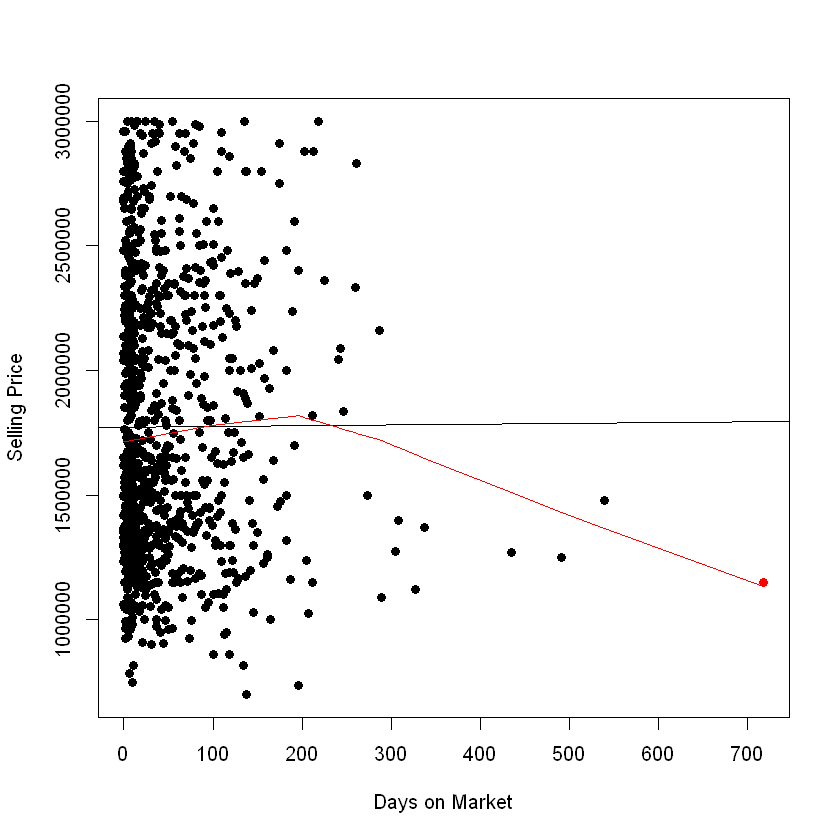

In [6]:
#To make scatter plot of y=selling price and x=days on market.
plot(mydata.train$Price ~ mydata.train$Days_on_market,xlab='Days on Market',ylab='Selling Price',pch=16)

#To find the linear relationship between explanary and response variable
z.dom <- lm(Price ~ Days_on_market, data = mydata.train)
summary(z.dom)

#To draw regression line
abline(1.771e+06,3.073e+01)

#To drsw the lowess line
lines(lowess(mydata.train$Days_on_market, mydata.train$Price, delta=100), col="red")

#To point the outlier, days on market=719 and selling price=1,150,000. On graph the point is showing red.
points(719,1150000,col='red',pch=19)

    #In the above part we discussed the relationship between selling price and the days on market. According to the lowess line we would conclude that there is a non-linear relationship. Once we plot the regression line (black), we would notice that the data above the regression line and the data below are in a similar pattern (the positions are almost offsetting each other), we would consider this as a moderate strength.
    
    In summary we would be able to conclude that there is a positive relationship between selling price and the days on market, where the correlation coefficient being 30.73. R square is low at 1.214e-05, meaning that there might not be enough evidence for the linear relationship. Thus we conduct the lowess line to show the non-linear relationship.
    
    It might be a bit counter-intuitive that more days the house on the market, the selling price would be even higher, within approximately 200 days on market. However, the reasons behind it is not hard to find. If a seller holds the property on the market for long, the willingness to accept maybe really high, thus the waiting time for a client with a high willingness to pay would be longer. Another possible reason would be the property itself. Most of the buyers are looking for a principal residence with a moderate living space and price, and because of this, the luxury properties, for which deserve a high selling price, are harder to find a potential buyer.
    
    This leads to the outliers in graph. The outlier is in red color showing in the scatter plot. The address of this property is 2775 ward st, Vancouver, located in Vancouver East near Kingsway. It was on listing for 719 days and sold for $1,150,000. According to housecreep.com, the property itself does not hold any accident or cannabis plating evidence. We would carefully guess the reason behind the story (HouseCreep, n.d.). One possible reason was the situation of this property may not be good enough to attract the buyers, for example, the agent was not doing staging before listing. Or the seller was not urge to utilize the fund, and was trying to waiting for a buyer with a high willingness to pay. According to BC Assessment Authority, the assessment value for this property was $1,139,800 in 2020, and might be lower in the year of 2019 (BC Assessment, n.d.).




Call:
lm(formula = Price ~ Total_floor_area, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1244927  -309103  -101646   263813  1902266 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      664598.73   49477.04   13.43   <2e-16 ***
Total_floor_area    451.14      19.39   23.27   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 436900 on 1040 degrees of freedom
Multiple R-squared:  0.3423,	Adjusted R-squared:  0.3417 
F-statistic: 541.3 on 1 and 1040 DF,  p-value: < 2.2e-16


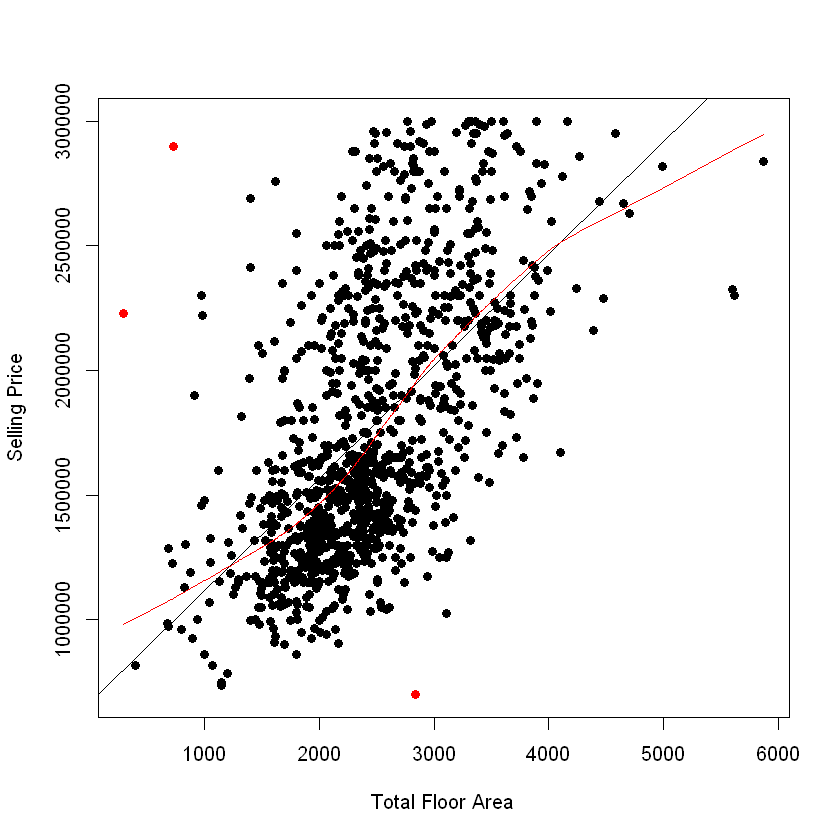

In [7]:
#Making scatter plot of y=selling price and x=total floor area
plot(mydata.train$Price ~ mydata.train$Total_floor_area,pch=16,xlab='Total Floor Area',ylab='Selling Price')

#Finding linear relationship between explanary and response variable
z.tfa <- lm(Price ~ Total_floor_area, data = mydata.train)
summary(z.tfa)

#Drawing regression line
abline(664598.73,451.14)

#lowess line
lines(lowess(mydata.train$Total_floor_area, mydata.train$Price, delta=100), col="red")

#color outliers
points(2838,700000,col='red',pch=19)
points(301,2230000,col='red',pch=19)
points(734,2898000,col='red',pch=19)

    In this model we focued on the response variable being selling price while the explanary variable being total floor area. The data visualizes a positive relationship, and with a moderate strength showing in the graph.The lowess line shows a linear relationship. 
    
    In summary we would be able to find the correlation coefficient being 451.14, shows a strong relationship bewteen selling price and total floor area. However, the p-value on this test is 2.2e-16, and it depends on the confidence level to determine the significance.
    
    In this dataset outliers are visible, with a red color in the graph. One of the outliers is the address of 2964 W 28TH AVE, Vancouver, with total floor area being 301 sq/ft and selling price being $2,230,000. According to BC Assessment Authority, the total floor area for this property should be 3049 sq/ft, thus there is enough evidence to conclude that this data is wrong (BC Assessment, n.d.).
    
    Another ourlier is 3962 W 30TH AVE, Vancouver. According to BC Asseddment Authority, this property is categorized as an "improvement Unclassified", and was rebuilt in year of 2021, meaning that this property was bought for rebuilding purpose, which further explains the relatively higher price (BC Assessment, n.d.).
    
    The last outlier is 3090 Kings Ave, Vancouver. This property was sold in a relatively lower price than others, one of the possible reason is it is close to skytrain tracks thus being noisy (BC Assessment, n.d.), another possible reason is the property was built in 1910, which may influence the price as well.

We have pointed 3 outliers in the correlation between selling price and total floor area. 
The first property is 3090 Kings Ave, Vancouver, BC. According to BC Assessment, the
1. age
2. close to skytrain track
3. 4 bed 2 bath
4. area





Call:
lm(formula = Price ~ Age, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1091693  -422510  -153732   363475  1391758 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1987636      31906  62.297  < 2e-16 ***
Age            -3698        471  -7.852 1.01e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 523400 on 1040 degrees of freedom
Multiple R-squared:  0.05597,	Adjusted R-squared:  0.05506 
F-statistic: 61.66 on 1 and 1040 DF,  p-value: 1.013e-14


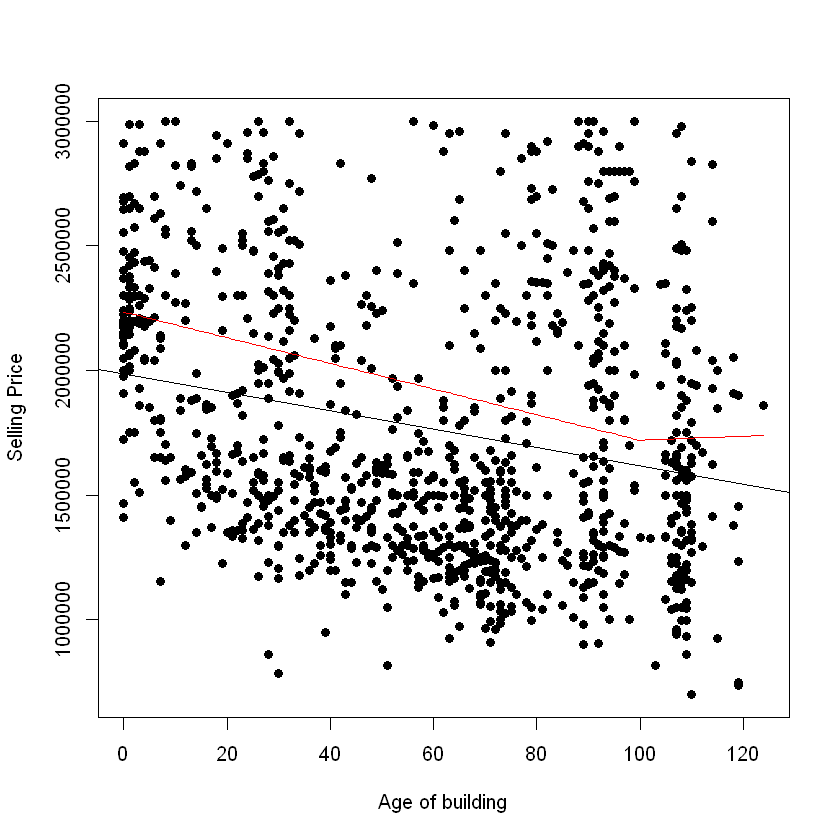

In [8]:
#Making scatter plot of y=selling price and x=Age of Building
plot(mydata.train$Price ~ mydata.train$Age,pch=16,xlab='Age of building',ylab='Selling Price')

#Finding linear relationship between explanary and response variable
z.a <- lm(Price ~ Age, data = mydata.train)
summary(z.a)

#Drawing regression line
abline(1987636,-3698)

#lowess line
lines(lowess(mydata.train$Age, mydata.train$Price, delta=100), col="red")

    This model is to expain selling price and age of building. The regression line and the lowess line both indicates a negative, linear relationship, and the points are dispersed relatively symmetrically and widely in the graph. Thus the relationship can be considered as a weak strength. The low R square, which is 0.05597 indicates that we do not have enough evidence to retain the hypothesis that there is a relationship between selling price and age of building.
    
    Since the data is distributed widely and symmetrically, we would not consider any points being outlier.

Association for y vs x. </code>
    1. Form: 
    2. Direction: 
    3. Strength: 
    4. Outliers: 


Call:
lm(formula = Price ~ Lot_Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1470676  -396711  -122121   396383  1288955 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.034e+06  5.399e+04   19.15   <2e-16 ***
Lot_Size    1.688e+02  1.185e+01   14.25   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 492700 on 1040 degrees of freedom
Multiple R-squared:  0.1634,	Adjusted R-squared:  0.1626 
F-statistic: 203.1 on 1 and 1040 DF,  p-value: < 2.2e-16


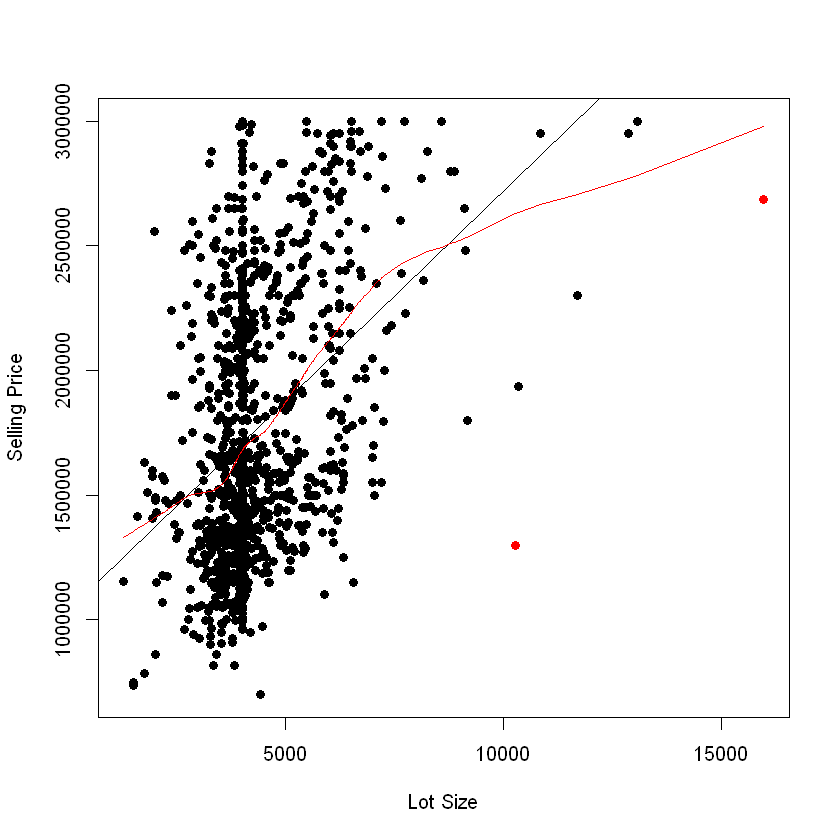

In [9]:
#Making scatter plot of y=selling price and x=Lot Size
plot(mydata.train$Price ~ mydata.train$Lot_Size,pch=16,xlab='Lot Size',ylab='Selling Price')

#Finding linear relationship between explanary and response variable
z.ls <- lm(Price ~ Lot_Size, data = mydata.train)
summary(z.ls)

#Drawing regression line
abline(1.034e+06,1.688e+02)

#lowess line
lines(lowess(mydata.train$Lot_Size, mydata.train$Price, delta=100), col="red")

#outliers
points(10287,1300000,col='red',pch=19)
points(15983,2685000,col='red',pch=19)

    This model is to illustrate the relationship between selling price and lot size. The lowess line indicates a positive relationship, with the data is distributed as a moderate strength. 
    
    Among those data an outlier can be recognized with the address 92 Malta Place, Vancouver. One of the possible reason is that it is located by the boundry of Vancouver so price would be lower. Another possible reason is according to BC Assessment Authority, the property was rebuilt in 2021, so this property at the time of listing maybe under a bad condition (BC Assessment, n.d.).
    
    Another outlier is 2270 SW Marine Dr, Vancouver. The closing date for this property is in May, 2020 according to BC Assessment Authority (BC Assessment, n.d.), in which the covid was already began and the market was tending to cool down. This might be the potential reason to be sold in a lower price.

---
<a id="Model_fit"></a>
# Model fit to training data, checking assumptions

In [10]:
# If you conducted any transformations of x or y in your final model:
# Create scatterplots that visualize the association between the variables as they are used in your model:
# Is the form linear for each of these associations after the transformations?

    We can choose a total of three models to make the transformation: logarithm, square, and interaction. All three methods can be combined and put into the same model, for example, log (y) =x1.square root+log (x2) +x1*x2.

    In order to make the most efficient selection, we used transformations for each variable on top of the original data. The 12 figures below show the three transformation methods representing how our four variables (Days on market, Age, Lot Size, and Total floor area) are related to Prices. These figures help us to choose which transformation is better when reflecting the relationship variables and Prices.
    
    When we read the 12 figures, we found that there is no obvious linear relationship between Days on market and Price with the logarithm method, and both the square and interaction transformations show vertical distributions between variables, which means no relationship between independent and dependent variables; so does lot size. Therefore we decided to drop the Days on market and Lot size. The other two variables, Age, and Total floor area, are more evenly distributed and more consistent with linear relationships using the logarithm transformations. 
    
    Interaction will be added as well after testing multiple models, we found the MAE and Root MSE are lower.

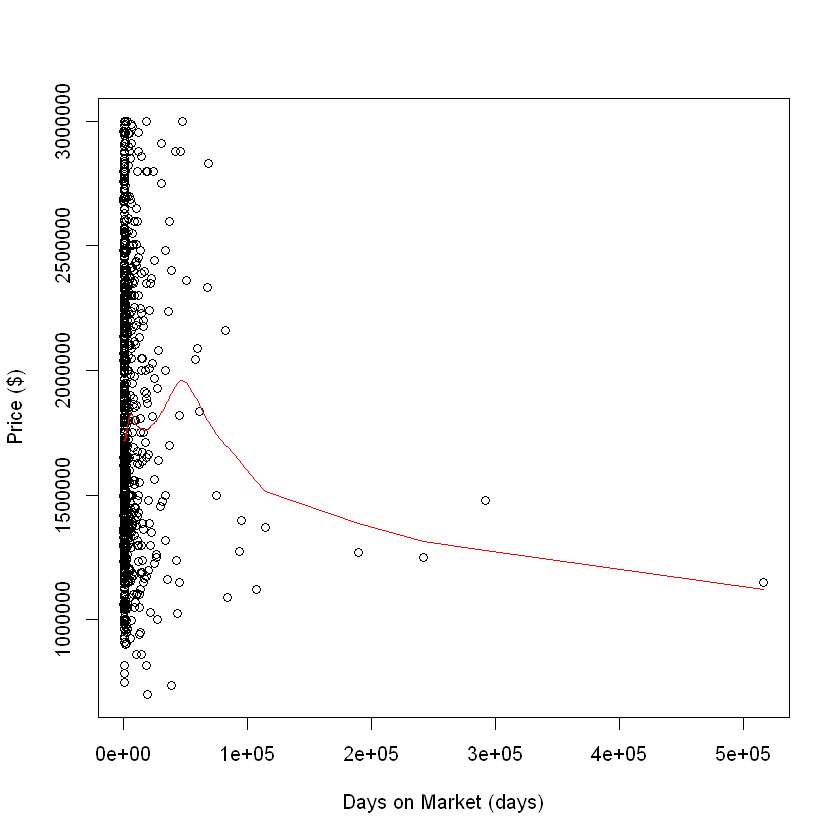

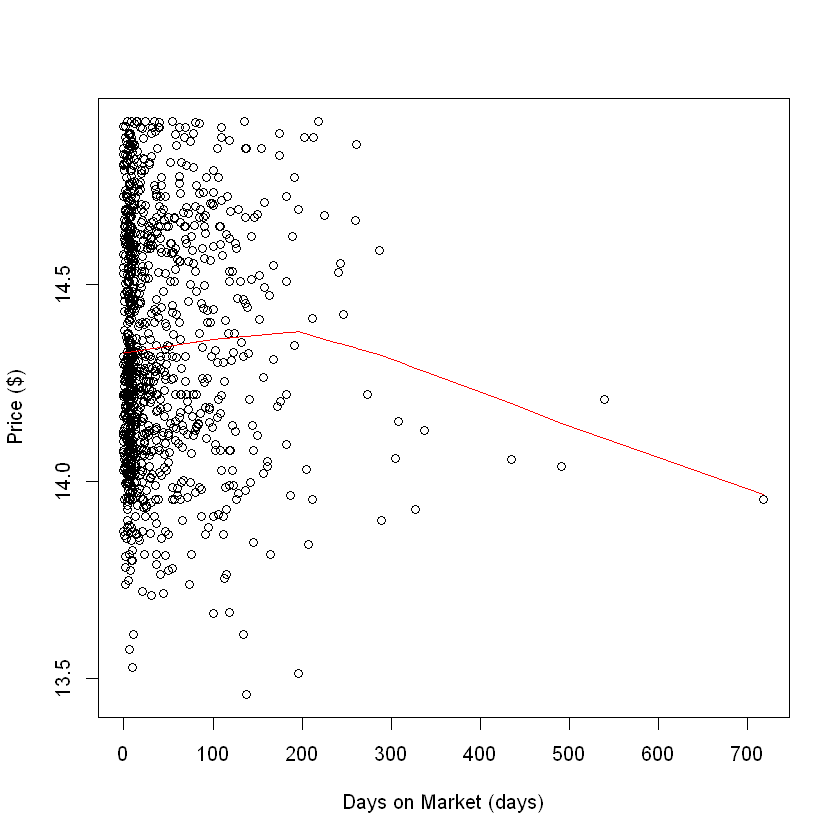

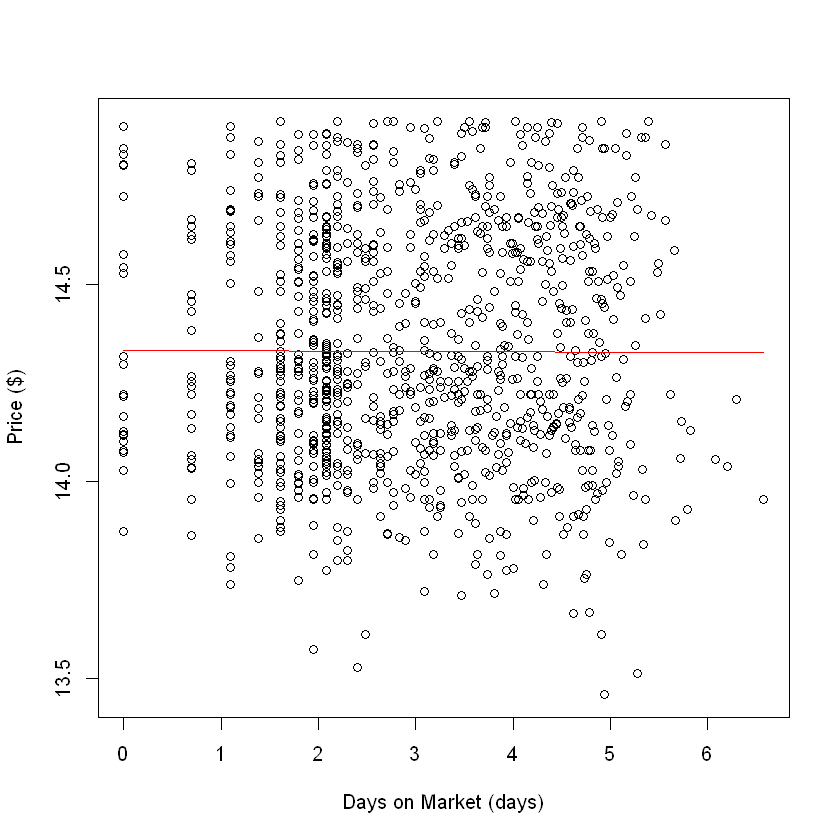

In [11]:
# Add any transformations to the training dataset:
# Add any transformations to the training dataset:
mydata.train$Days_on_market.sq <- (mydata.train$Days_on_market)^2
mydata.train$Days_on_market.log <- log(mydata.train$Days_on_market+1)
mydata.train$Price.log <- log(mydata.train$Price)

plot(Price ~ Days_on_market.sq, data = mydata.train,xlab='Days on Market (days)', ylab='Price ($)')
lines(lowess(mydata.train$Days_on_market.sq, mydata.train$Price, delta=100), col="red")
plot(Price.log ~ Days_on_market, data = mydata.train,xlab='Days on Market (days)', ylab='Price ($)')
lines(lowess(mydata.train$Days_on_market, mydata.train$Price.log, delta=100), col="red")
plot(Price.log ~ Days_on_market.log, data = mydata.train,xlab='Days on Market (days)', ylab='Price ($)')
lines(lowess(mydata.train$Days_on_market.log, mydata.train$Price.log, delta=100), col="red")

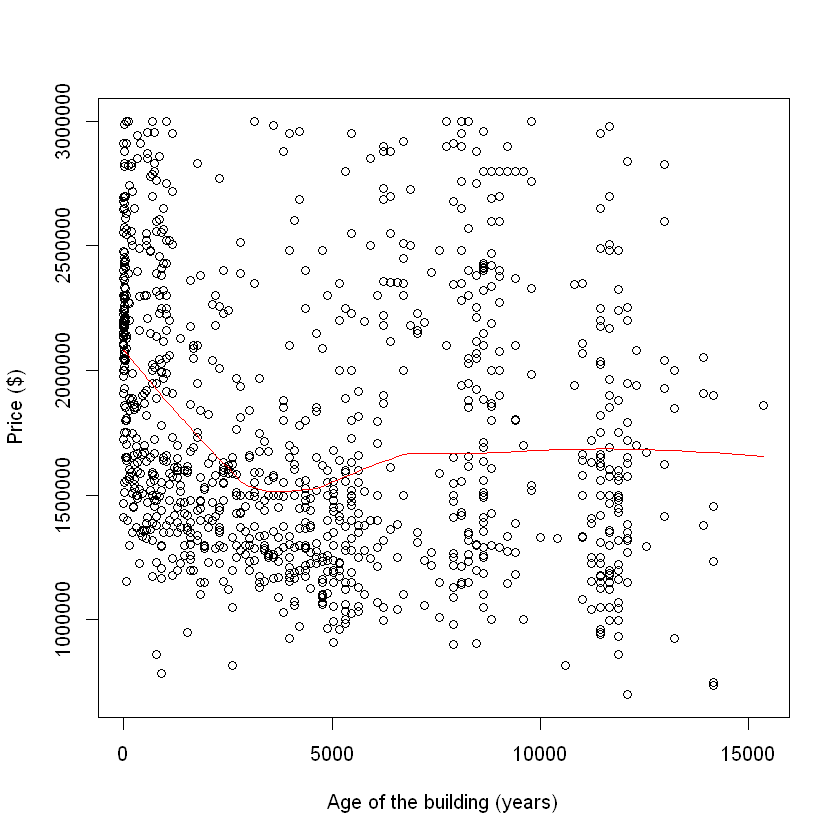

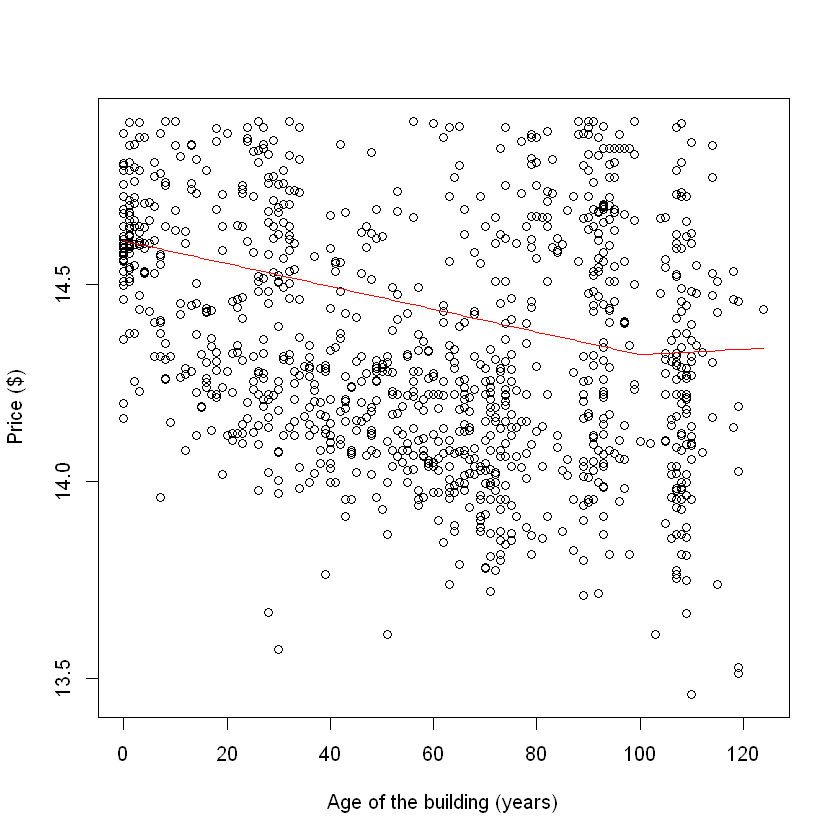

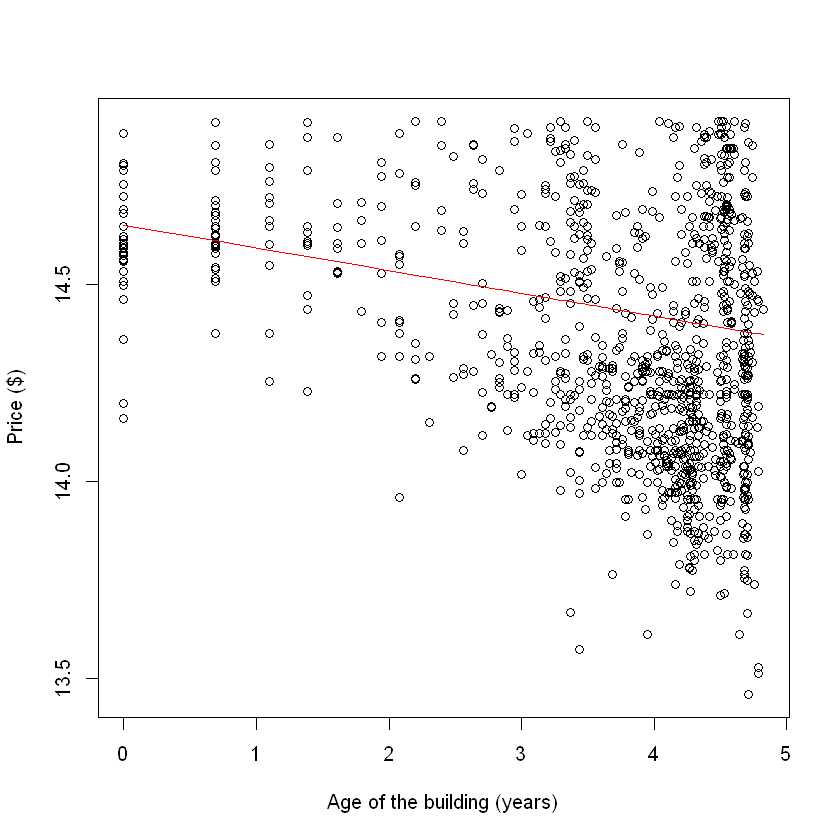

In [12]:
mydata.train$Age.sq <- (mydata.train$Age)^2
mydata.train$Age.log <- log(mydata.train$Age+1)
mydata.train$Price.log <- log(mydata.train$Price)

plot(Price ~ Age.sq, data = mydata.train,xlab='Age of the building (years)', ylab='Price ($)')
lines(lowess(mydata.train$Age.sq, mydata.train$Price, delta=100), col="red")
plot(Price.log ~ Age, data = mydata.train,xlab='Age of the building (years)', ylab='Price ($)')
lines(lowess(mydata.train$Age, mydata.train$Price.log, delta=100), col="red")
plot(Price.log ~ Age.log, data = mydata.train,xlab='Age of the building (years)', ylab='Price ($)')
lines(lowess(mydata.train$Age.log, mydata.train$Price.log, delta=100), col="red")

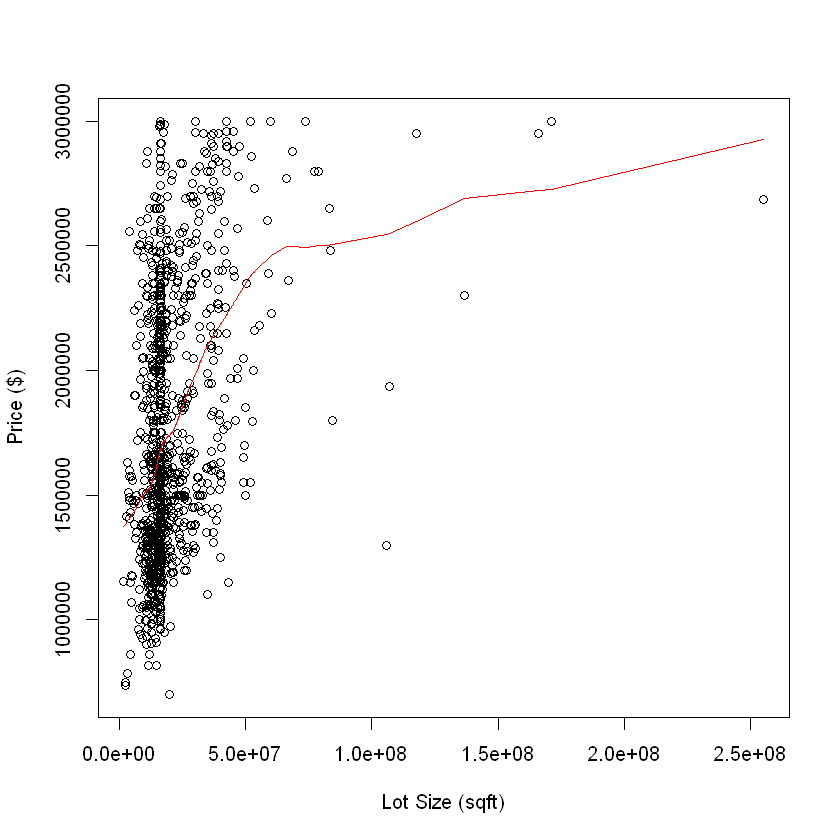

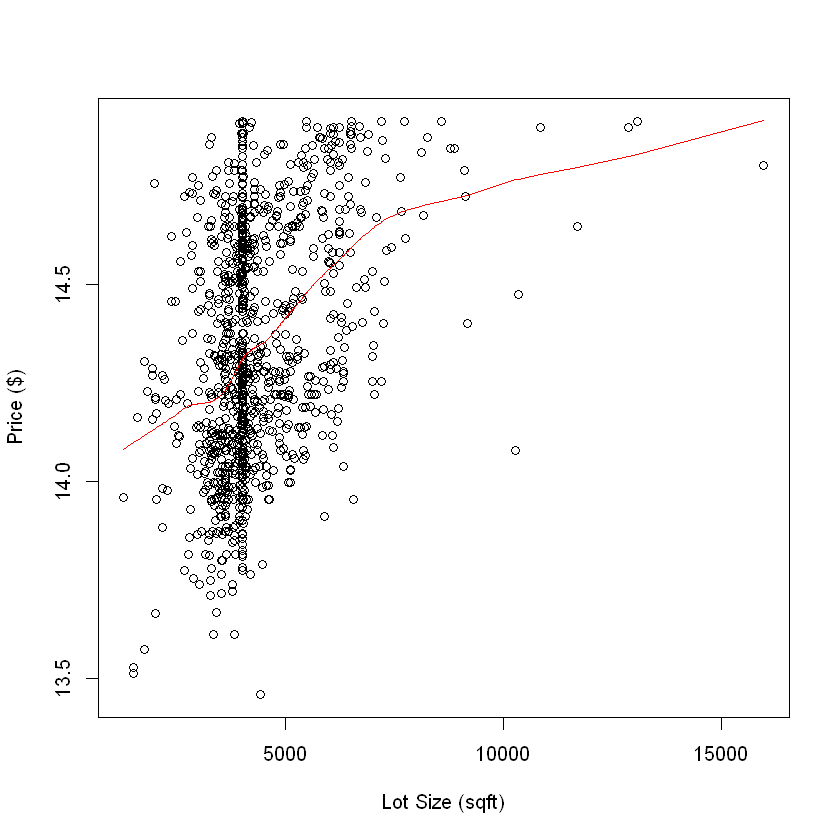

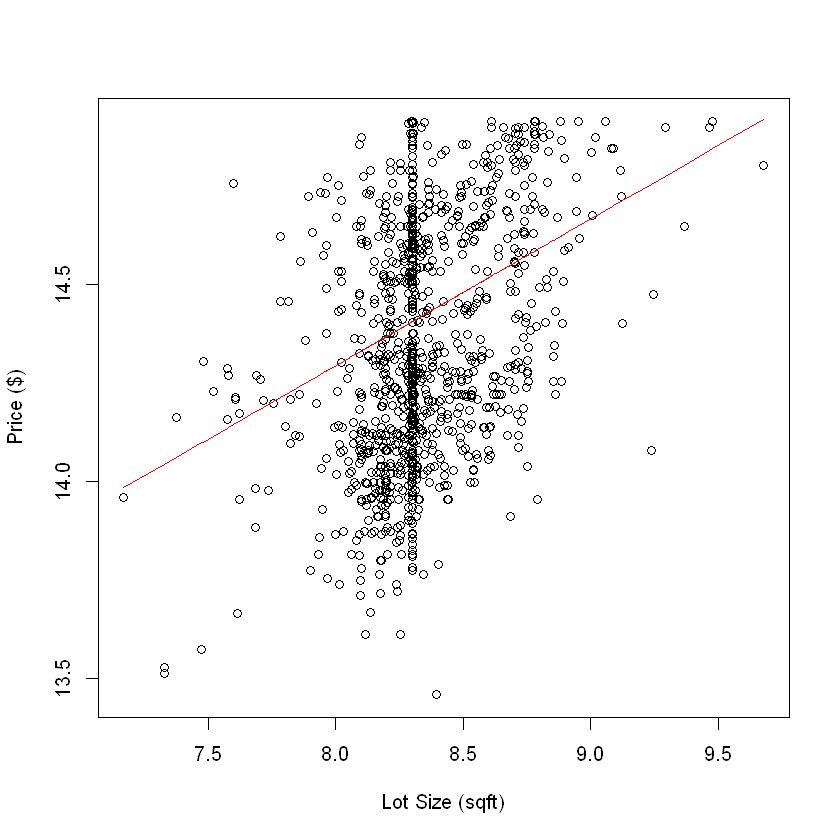

In [13]:
mydata.train$Lot_Size.log <- log(mydata.train$Lot_Size)
mydata.train$Price.log <- log(mydata.train$Price)
mydata.train$Lot_Size.sq <- (mydata.train$Lot_Size)**2

plot(Price ~ Lot_Size.sq, data = mydata.train,xlab='Lot Size (sqft)', ylab='Price ($)')
lines(lowess(mydata.train$Lot_Size.sq, mydata.train$Price, delta=100), col="red")
plot(Price.log ~ Lot_Size, data = mydata.train,xlab='Lot Size (sqft)', ylab='Price ($)')
lines(lowess(mydata.train$Lot_Size, mydata.train$Price.log, delta=100), col="red")
plot(Price.log ~ Lot_Size.log, data = mydata.train,xlab='Lot Size (sqft)', ylab='Price ($)')
lines(lowess(mydata.train$Lot_Size.log, mydata.train$Price.log, delta=100), col="red")

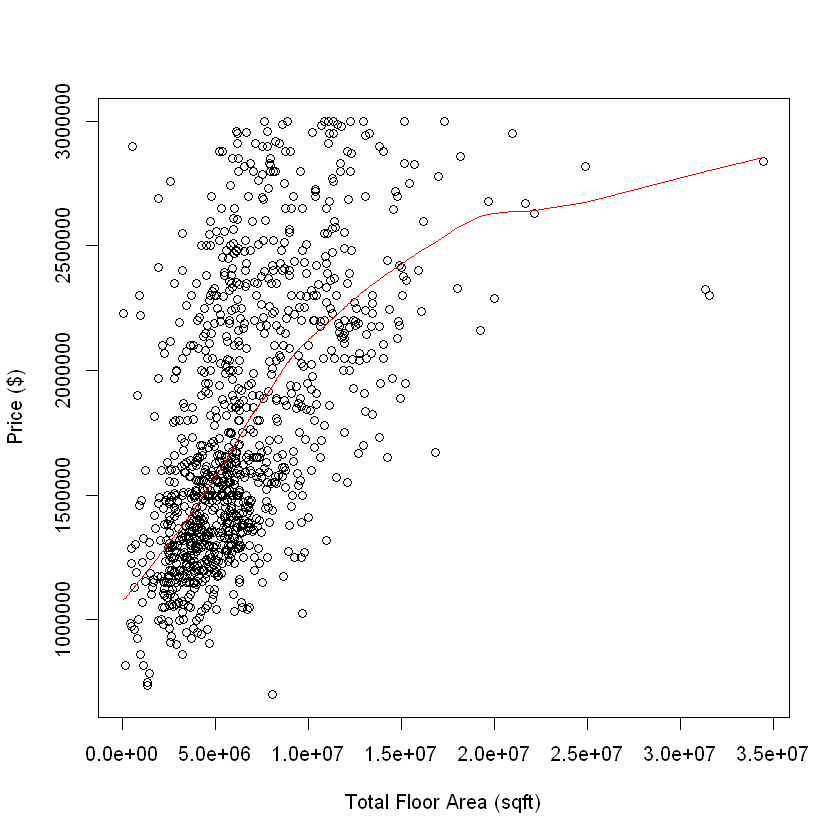

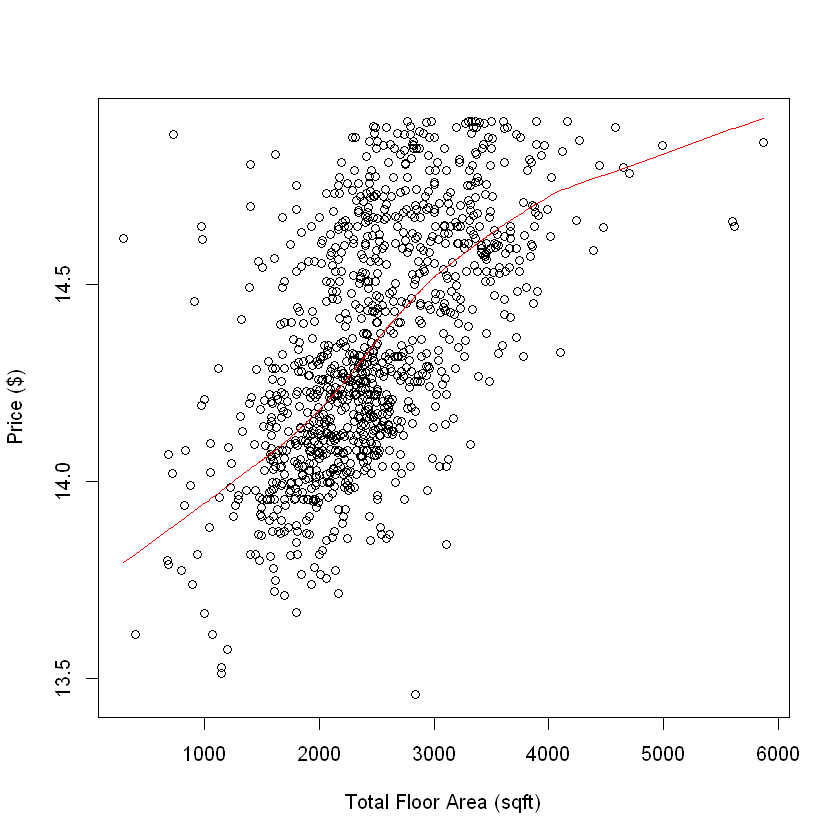

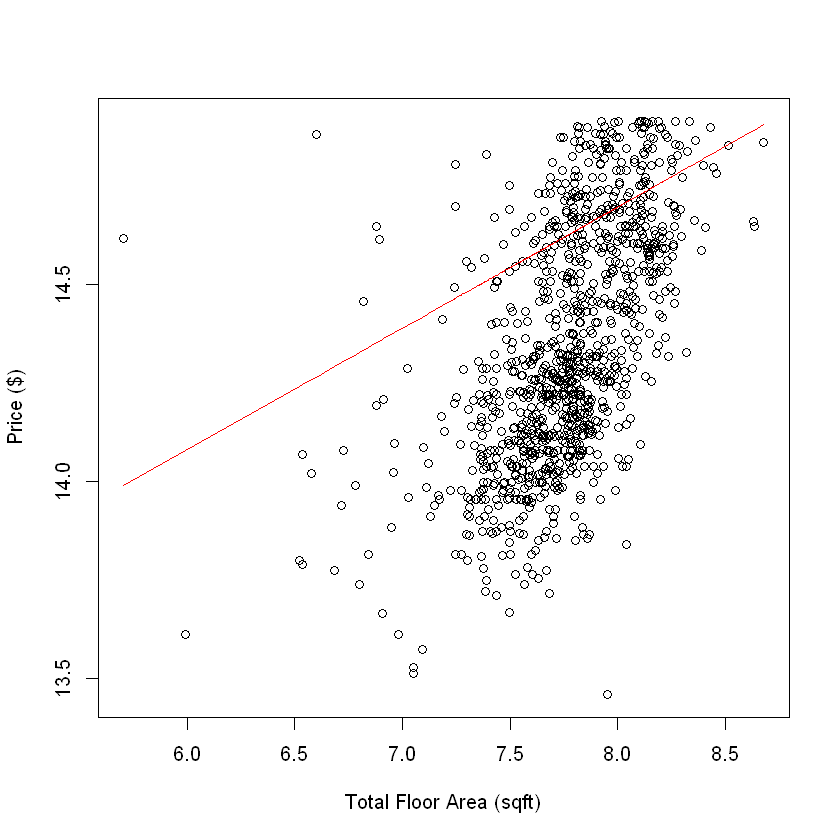

In [14]:
mydata.train$Total_floor_area.sq <- (mydata.train$Total_floor_area)^2
mydata.train$Total_floor_area.log <- log(mydata.train$Total_floor_area)
mydata.train$Price.log <- log(mydata.train$Price)

plot(Price ~ Total_floor_area.sq, data = mydata.train,xlab='Total Floor Area (sqft)', ylab='Price ($)')
lines(lowess(mydata.train$Total_floor_area.sq, mydata.train$Price, delta=100), col="red")
plot(Price.log ~ Total_floor_area, data = mydata.train,xlab='Total Floor Area (sqft)', ylab='Price ($)')
lines(lowess(mydata.train$Total_floor_area, mydata.train$Price.log, delta=100), col="red")
plot(Price.log ~ Total_floor_area.log, data = mydata.train,xlab='Total Floor Area (sqft)', ylab='Price ($)')
lines(lowess(mydata.train$Total_floor_area.log, mydata.train$Price.log, delta=100), col="red")

### Fit your final model (1 mark for this model being appropriate for the data)

In [15]:
# Fit your final model here, use summary to get model co-efficients and other useful output:
z <- lm(Price.log ~ Age.log + Total_floor_area.log + Age.log*Total_floor_area.log, data=mydata.train)
summary(z)


Call:
lm(formula = Price.log ~ Age.log + Total_floor_area.log + Age.log * 
    Total_floor_area.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94276 -0.17702 -0.04697  0.17264  1.36066 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  11.22739    0.84779  13.243  < 2e-16 ***
Age.log                      -0.20432    0.20491  -0.997    0.319    
Total_floor_area.log          0.42144    0.10571   3.987 7.17e-05 ***
Age.log:Total_floor_area.log  0.02098    0.02562   0.819    0.413    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2455 on 1038 degrees of freedom
Multiple R-squared:  0.3385,	Adjusted R-squared:  0.3366 
F-statistic:   177 on 3 and 1038 DF,  p-value: < 2.2e-16


**Write the equation of your model, replacing the co-efficients with the numbers from the output of the summary command: (0.5 marks)**  


predicted value for house sale price = 11.22739 - 0.20432 * log of Age of the building + 0.42144 * log of total floor area + 0.02098 * interaction term
</code> 




**Interpret the value of each co-efficient assuming that the x-variables are independent of each other (you do not need to interpret the intercept) If you have an interaction, describe the type of interaction (reinforcement, interference): (1 mark)**    
    
    There is a negative relationship between the age of building and price, though very low (-0.20432), and a positive moderate relationship between total floor area and price (0.42144). The interaction term shows an reinforcement of the combinated effect of age and floor area.
</code> 



---
## Check the assumptions (3 marks)
Create plots / conduct tests and write a sentence to interpret each result.


	Shapiro-Wilk normality test

data:  resid.values
W = 0.97374, p-value = 8.545e-13


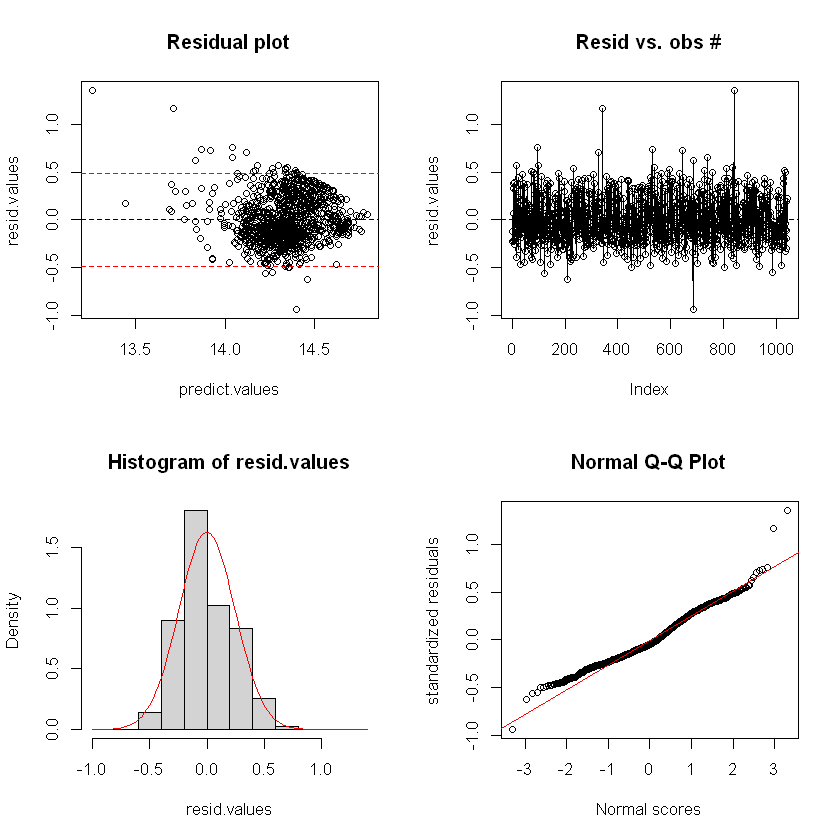

In [16]:
# Check assumptions of linearity, equal variance, normality here.
# Comment on any unusual observations (outliers) that are observed.
# Check assumptions of linearity, equal variance, normality here.
# Comment on any unusual observations (outliers) that are observed.
checkresiduals <- function(z.linear) {
  predict.values <- predict(z.linear)
  resid.values <- resid(z.linear)
  
  
  if (max(resid.values) > 3*summary(z.linear)$sigma) {
    ymax <-  max(resid.values)
  } else {
    ymax <-  3*summary(z.linear)$sigma 
  }
  
  if (min(resid.values) < -3*summary(z.linear)$sigma) {
    ymin <-  min(resid.values)
  } else {
    ymin <-  -3*summary(z.linear)$sigma 
  }
  
  
  par(mfrow=c(2,2))
  plot(resid.values ~ predict.values, ylim=c(ymin, ymax), main = "Residual plot")
  abline(0,0, lty=2)
  se <- summary(z.linear)$sigma
  abline(2*se, 0, col="red", lty=2)
  abline(-2*se, 0, col="red", lty=2)
  
  
  plot(resid.values, main = "Resid vs. obs #")
  abline(0,0, lty=2)
  lines(resid.values)
  
    
  hist(resid.values, prob = TRUE)
  curve(dnorm(x, mean = mean(resid.values), sd = sd(resid.values)), col = 'red', add = TRUE)
  
    
  qqnorm(resid.values, ylab= "standardized residuals", xlab = "Normal scores")
  qqline(resid.values, col= "red")
  
  shapiro.test(resid.values)
}
checkresiduals(z)


    Check the assumptions:

    - Linearity:
Based on the Residual plot, we can tell it is evenly distributed above and under the area where y=0. There is outliers in residual plot, for example in the top left corner, however since most of data are still fall into the central area, we do not consider it violates the linearity.


    - Equal Variance:
Based on the Residual vs. Observation # plot, we can tell it is evenly distributed, and there are three outliers shown in the plot, though it does not violates the equal variance assumption.


    - Normality: 
  - By checking histogram, we see the residual values are normally distributed with center at 0.0.
  - By cheking Q-Q Plot,standarized residuals are distributed close to Q-Q line.
  - By checking Shapiro-Wilk normality test, p-value is less than 0.05, which leads to a rejection of meeting normality assumption. This would leads to a limitation of this project. Better dataset and experiment method needs to be found to conduct a better test.


*You do not need to consider how the assumption of independence could be violated due to time.*
  
  
**Describe how the assumption of independence could be violated for this dataset in relation to space. (200 words max.) (2 marks)**  

    
    The assumption of independence could be violated as the dataset was gathered all in the same area, Vancouver. As people who live in the same area tend to be more similar in certain ways. In the real world, the house prices in the same area are usually related to each other. For example, the house prices that are sold in the same area before could be considered when setting the house prices that are sold later in the market from the same area.  
    
    
    Also we would remain curious about the randomization of the dataset. In a same year of 2019, people might tend to buy a certain area (Vancouver West or Vancouver East) or a certain type (condo or townhouse, etc). This could be a violation of independece assumption, too.
</code> 

---
## Goodness of fit to the training set. (0.5 marks)
Find the R2 value and the residual standard error. If you transformed the y-variable, get predicted values back in the original units, then calculate these yourself.

In [17]:
predict_z <- predict(z)
SSY.z <- sum((mydata.train$Price - mean(mydata.train$Price))^2); SSY.z
SSE.z <- sum((mydata.train$Price - exp(predict_z))^2); SSE.z
psr2.z <- 1-SSE.z/SSY.z; psr2.z
RSE.z <- sqrt(SSE.z/(nrow(mydata.train)-3-1));RSE.z

[1] 3.017991e+14

[1] 2.036077e+14

[1] 0.3253535

[1] 442892.6

    Pseudo r square is calculated as transformation was used. With 0.325354 being a medium-leveled correlation, and a large number (442892.580476) of Residual standard error. The pseudo R square seems good, however, the Residual standard error is really high, after trying different models (included in candidate model part), they all have similar value thus this leads to another limiation of the model.


---
## Do you have any concerns about the explanatory variables being related to each other? (1 mark)

Show plots and/or do analyses to support your conclusions. If there are associations between explanatory variables, what effect could this have on your model? How would this affect your predictions?  

    In Vancouver, land for housing is becoming more and more expensive, and old houses are usually bigger, especially apartments. Therefore, it is reasonable to include the concerns about correlations between total floor area and age of the building in our model. Here we will do VIF analysis to test it.

In [18]:
library(Hmisc)
library(car)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: carData



In [19]:
z1 <- lm(Price.log ~ Age.log + Total_floor_area.log, data=mydata.train)
vif(z1)

Age.log Total_floor_area.log 
            1.159526             1.159526

    We are using the interaction model so there definitely a high VIF if we conduct the vif test for the x variables. Thus we would drop the interaction term for vif test.
    
    Since there are only 2 explanary variables so value of VIFs are the same (1.159526). This value is less than 10 (and even less than 5) so we would conclude that there is no significant correlation between total floor area and age of building thus no need to drop anyone of them from the model.

---
<a id="Hyp_tests"></a>
## Hypothesis tests (1.5 marks)

Conduct an F-test for the significance of the regression and t-tests for the significance of each variable. If you have an interaction in your model, show only the test for the interaction (do not test the main effects).  
Write the concluding sentence for each hypothesis test, then in brackets include the test statistic and a p-value). Use alpha = 0.05 to make all decisions for this project.  
E.g.: The variable log baha is significant in the final model (t statistic = 15.32, df error = 38, p-value < 0.0001).

What do these results tell you about the contribution of each variable to your final model?


In [20]:
#Interaction test
drop1(z, test="F")

#p value<p critical, reject, interaction term is significant.

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,62.58509,-2922.490,NA,NA
Age.log:Total_floor_area.log,1,0.04042561,62.62552,-2923.817,0.6704757,0.4130737


    - Test of interaction (with F value being 0.670476, p value being 0.413074 and df error being 1)
    Since the p-value (0.413073) is lower than 0.05, we will reject the null hypothesis, so the interaction is significant.

    This means that interaction term does contribute to the model and there is an reinforcement as the age and total floor area has a addition effect on price.


---
<a id="Prediction"></a>
## Using the model for prediction (1 mark)

Generate predicted values using the **validation set data** as input in the final model. Make sure that you are still using the model that was fit to the training set data, and only using the test set data as new x-values.

Calculate the mean absolute error (MAE) and root mean squared error (root MSE) for the validation set.
If you transformed the y-variable, get predicted values back in the original units prior to calculating these.

    Prediction with log transformation on price on validation set:

In [21]:
mydata.valid$Price.log <- log(mydata.valid$Price)
mydata.valid$Lot_Size.log <- log(mydata.valid$Lot_Size)
mydata.valid$Age.log <- log(mydata.valid$Age+1)
mydata.valid$Total_floor_area.log <- log(mydata.valid$Total_floor_area)

predict.z <- predict(z, newdata=mydata.valid)
predict.z

1        2        3        4        5        6        7        8 
14.39399 14.12423 14.52041 14.07314 14.42223 14.20955 14.20863 14.32314 
       9       10       11       12       13       14       15       16 
14.17548 14.49347 14.52578 14.32495 14.30127 14.47085 14.84978 14.40768 
      17       18       19       20       21       22       23       24 
14.32614 14.29437 14.46227 13.78467 14.36432 14.33858 14.50315 14.65045 
      25       26       27       28       29       30       31       32 
14.34473 14.40804 14.15561 14.33006 14.14590 14.30373 13.82683 14.62258 
      33       34       35       36       37       38       39       40 
14.35889 14.37331 14.39597 14.22530 14.42863 14.31553 14.12750 14.23921 
      41       42       43       44       45       46       47       48 
13.80982 14.52606 14.38408 14.22597 14.39134 14.53898 14.29167 14.14794 
      49       50       51       52       53       54       55       56 
14.17744 14.33143 14.33157 14.12290 14.38561 14.36981 14.31163 14.42220 
      57       58       59       60       61       62       63       64 
14.37972 14.08625 14.33290 14.37219 14.35163 14.28220 14.56856 14.21602 
      65       66       67       68       69       70       71       72 
14.22039 14.46226 14.46924 14.26268 14.54174 14.55402 14.60255 14.48320 
      73       74       75       76       77       78       79       80 
14.19905 14.34692 14.57606 14.48288 14.52162 14.41039 14.18220 14.13128 
      81       82       83       84       85       86       87       88 
14.50144 14.10363 14.44447 14.38627 14.21813 14.25884 14.34024 14.17831 
      89       90       91       92       93       94       95       96 
14.09525 14.65431 14.34383 14.30493 14.03575 14.24783 14.33286 14.31424 
      97       98       99      100      101      102      103      104 
14.19183 14.24008 14.30653 14.33730 14.16901 14.25823 14.22750 14.36255 
     105      106      107      108      109      110      111      112 
14.59592 14.40600 14.24458 14.42072 14.26140 14.37343 14.27243 14.44893 
     113      114      115      116      117      118      119      120 
14.25948 14.44814 14.28646 14.07610 14.37332 14.34061 14.21209 14.45891 
     121      122      123      124      125      126      127      128 
14.13681 14.30816 14.36155 14.14523 14.53629 14.31598 14.17712 14.42050 
     129      130      131      132      133      134      135      136 
14.76380 14.33157 14.55823 14.48733 14.24818 14.36392 14.71940 14.09868 
     137      138      139      140      141      142      143      144 
14.37698 14.38118 14.35463 14.36935 14.51800 14.32975 14.75406 14.35954 
     145      146      147      148      149      150      151      152 
14.41351 14.36704 14.19408 14.35578 14.56455 14.10344 14.10467 14.29536 
     153      154      155      156      157      158      159      160 
14.31764 14.56594 13.85405 14.44437 14.49891 14.28617 14.56151 14.35600 
     161      162      163      164      165      166      167      168 
14.28755 14.17559 14.34911 14.37236 14.18882 14.34870 14.11520 14.35985 
     169      170      171      172      173      174      175      176 
14.32121 14.31383 14.35100 14.46578 14.32386 14.30306 14.22906 14.63732 
     177      178      179      180      181      182      183      184 
14.48613 14.46940 14.09592 14.31442 14.35200 14.19740 14.52225 14.40583 
     185      186      187      188      189      190      191      192 
14.42197 14.36400 14.55075 14.64394 14.38440 14.67017 14.32889 14.51396 
     193      194      195      196      197      198      199      200 
14.61293 14.44586 14.37513 14.64273 14.16553 14.57243 14.51720 14.41633 
     201      202      203      204      205      206      207      208 
14.28831 14.13473 14.08625 14.38457 14.46646 14.59199 14.29473 14.39279 
     209      210      211      212      213      214      215      216 
14.25321 14.27774 14.21488 14.33914 14.39120 14.37302 14.15520 14.11448 
     217      218      219      220      221      222      223   

    Prediction after back transformation on price on validation set:

In [22]:
price.transback <- exp(predict.z); price.transback

1         2         3         4         5         6         7         8 
1783322.0 1361674.4 2023639.7 1293864.3 1834397.8 1482952.4 1481591.0 1661341.6 
        9        10        11        12        13        14        15        16 
1433287.7 1969860.5 2034536.2 1664352.0 1625410.6 1925790.1 2813060.2 1807904.7 
       17        18        19        20        21        22        23        24 
1666345.1 1614233.8 1909340.4  969632.9 1731196.5 1687198.9 1989010.8 2304685.0 
       25        26        27        28        29        30        31        32 
1697601.1 1808559.4 1405088.0 1672885.0 1391505.8 1629419.5 1011379.5 2241328.2 
       33        34        35        36        37        38        39        40 
1721816.8 1746817.6 1786860.4 1506508.1 1846185.2 1648748.3 1366143.5 1527602.6 
       41        42        43        44        45        46        47        48 
 994325.0 2035099.4 1765740.9 1507508.7 1778613.5 2061579.7 1609876.5 1394344.5 
       49        50        51        52        53        54        55        56 
1436098.8 1675174.1 1675413.8 1359873.6 1768434.2 1740718.1 1642333.0 1834342.8 
       57        58        59        60        61        62        63        64 
1758049.8 1310938.8 1677645.1 1744871.3 1709367.1 1594705.7 2123462.7 1492587.9 
       65        66        67        68        69        70        71        72 
1499117.1 1909323.8 1922696.2 1563872.8 2067264.4 2092818.7 2196875.2 1949734.4 
       73        74        75        76        77        78        79        80 
1467469.3 1701325.4 2139461.1 1949096.5 2026083.5 1812804.9 1442944.0 1371318.5 
       81        82        83        84        85        86        87        88 
1985619.0 1333912.4 1875655.5 1769602.0 1495733.9 1557879.4 1689995.7 1437347.3 
       89        90        91        92        93        94        95        96 
1322779.7 2313598.6 1696081.0 1631367.8 1246377.0 1540832.7 1677570.1 1646632.5 
       97        98        99       100       101       102       103       104 
1456916.8 1528938.5 1633981.1 1685046.1 1424039.8 1556934.8 1509811.8 1728123.3 
      105       106       107       108       109       110       111       112 
2182369.6 1804863.1 1535829.6 1831631.0 1561874.4 1747037.8 1579199.9 1884046.3 
      113       114       115       116       117       118       119       120 
1558890.3 1882554.9 1601520.3 1297695.4 1746837.3 1690619.7 1486725.5 1902941.5 
      121       122       123       124       125       126       127       128 
1378923.6 1636639.3 1726395.9 1390579.2 2056032.6 1649490.0 1435637.0 1831238.8 
      129       130       131       132       133       134       135       136 
2581279.0 1675413.8 2101643.3 1957797.3 1541363.0 1730499.0 2469185.8 1327327.9 
      137       138       139       140       141       142       143       144 
1753244.8 1760634.1 1714495.8 1739924.1 2018776.3 1672365.6 2556265.0 1722939.7 
      145       146       147       148       149       150       151       152 
1818481.3 1735907.2 1460189.7 1716473.0 2114967.1 1333664.3 1335299.3 1615827.6 
      153       154       155       156       157       158       159       160 
1652231.1 2117906.2 1039289.6 1875473.0 1980597.8 1601051.6 2108551.1 1716841.2 
      161       162       163       164       165       166       167       168 
1603265.9 1433438.0 1705052.2 1745167.2 1452528.5 1704361.1 1349439.7 1723463.5 
      169       170       171       172       173       174       175       176 
1658144.5 1645950.5 1708284.1 1916059.8 1662545.6 1628314.0 1512169.3 2274608.7 
      177       178       179       180       181       182       183       184 
1955456.0 1922997.5 1323666.9 1646931.1 1709998.4 1465049.2 2027378.6 1804569.6 
      185       186       187       188       189       190       191       192 
1833919.4 1730633.6 2085988.2 2289730.6 1766305.2 2350572.5 1670928.4 2010636.6 
      193       194       195       196       197       198       199       200 
2219807.5 1878259.8 1750001.3 2286948.3

In [23]:
mydata.valid2 <- as.data.frame(cbind(mydata.valid, price.transback))
head(mydata.valid2)

mydata.valid2$errors.z <- mydata.valid2$Price - mydata.valid2$price.transback


RMSE.z <- sqrt(sum(mydata.valid2$errors.z^2)/nrow(mydata.valid2)); RMSE.z
MAE.z <- sum(abs(mydata.valid2$errors.z))/nrow(mydata.valid2); MAE.z

,Number,Address,List.Date,Price,Days_on_market,Total_floor_area,Year_Built,Age,Lot_Size,Price.log,Lot_Size.log,Age.log,Total_floor_area.log,price.transback
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1043,3432 E 23RD AVENUE,6/11/2019,1314000,43,2650,1966,53,3960,14.08859,8.283999,3.988984,7.882315,1783322
2,1044,3379 W 23RD AVENUE,9/11/2019,2175000,14,1636,1928,91,4026,14.59254,8.300529,4.521789,7.400010,1361674
3,1045,5597 INVERNESS STREET,3/4/2019,1950000,145,2964,2012,7,4125,14.48334,8.324821,2.079442,7.994295,2023640
4,1046,3427 MONS DRIVE,11/6/2019,1210000,1,1446,1948,71,4510,14.00613,8.414052,4.276666,7.276556,1293864
5,1047,3492 E 49TH AVENUE,3/12/2020,1360000,47,2782,1972,48,4845,14.12300,8.485703,3.891820,7.930925,1834398
6,1048,6282 WINDSOR STREET,12/10/2019,1380000,8,1876,1953,66,4026,14.13759,8.300529,4.204693,7.536897,1482952


[1] 459584.3

[1] 363373.5

    As performance measures，RMSE (residual standard error for validation set) is 459584.257096 and MAE (average absolute error) is 363373.464273.


---
<a id="Compare"></a>
## Comparing to other candidate models (1 mark for models A and B being appropriate for the data)
Compare the MAE and root MSE (for the validation set) from your final model to these values for at least two other candidate models (include the code for these models at the end of this notebook). If you transformed the y-variable, get predicted values back in the original units prior to calculating these.

Include your results in the table below (add more rows if you would like):

| Model | MAE | root MSE | model statement|
|------|------|------|------|
| Final model | 363373.46 | 459584.26 | Price.log ~ Age.log + Total_floor_area.log + Age.log*Total_floor_area.log |
| Model A | 363322.64 | 460625.79 | Price.log ~ Age.log + Total_floor_area.log |
| Model B | 375072.22 | 461816.50 | Price ~ Age + Total_floor_area + Age*Total_floor_area |

**Write the model statement (which you used in the lm function) for each of your candidate models by replacing the model statements in the table above. Make it clear how each variable was transformed.**  



    - Final model
We did log transformation for Price, age and total floor area.Based on transformation model, we add interaction term between age and total floor area. So it is a mix of log transformation and interaction model.

    - Candidate model A
With variables still under log transformation, we dropped the interaction term.

    - Candidate model B
Keeping the interaction term, we dropped the log transformation.

---
<a id="Discussion"></a>
# Discussion (400 words max.) (6 marks)

    Our goal for this project is to find a model to predict future price, with days on market, age of building, total floor area and lot size. Based on our final model, we found a negative relationship between age of building and price, a positive relation between total floor area. Since we consider there is no linear relationship for days on market and price, either for lot size and price, these two variables are dropped from our modeling. The pseudo R square is 0.325, which is moderate and residual R square is 442679.40. 

    The strengths for our model are under 3 aspects. First we compared the model with different transformations, and concluded that the log model is the best fit. Besides, we dropped two variables which do not show a linear relationship with the dependent variable. Other than that we also considered interaction, with the testing, we concluded that the reinforcement of the interaction is significant. 

    While the model has a significant result, there are some limitations as well. The first thing is the assumptions. In the assumption part we mentioned that the model does not pass the Shapiro-Wilk normality test, and there are doubts about the independence assumption as well. Since these assumptions are being violated, at the time we still question the expectation of the error term to be 0. Another limitation is the MAE and Root MSE are huge. It can be explained by price is usually large in the unit of million dollars however, this still needs to be further discussed. One more thing we would like to mention is there are further more variables that are potentially related to Vancouver house price, such as location, school area, density population, transportation and so on. Thus, more variables and more modeling needs to be set up and discussed in further study.


    This leads to our recommendation. More data needs to be collected to conduct better modeling. An ideal dataset will include more areas, longer time frame and even more variables. Also, since the normality test was not passed, we either need to gather more data or to do a non-parametric version of the test to improve this situation (Minitab Blog Editor, 2015).


    Reference

    Editor, M. B. (n.d.). What should I do if my data is not normal? Minitab Blog. Retrieved October 14, 2022, from https://blog.minitab.com/en/understanding-statistics-and-its-application/what-should-i-do-if-my-data-is-not-normal-v2 
</code> 


---
<a id="Transformations"></a>
# Visualizing appropriate transformations (1 mark)


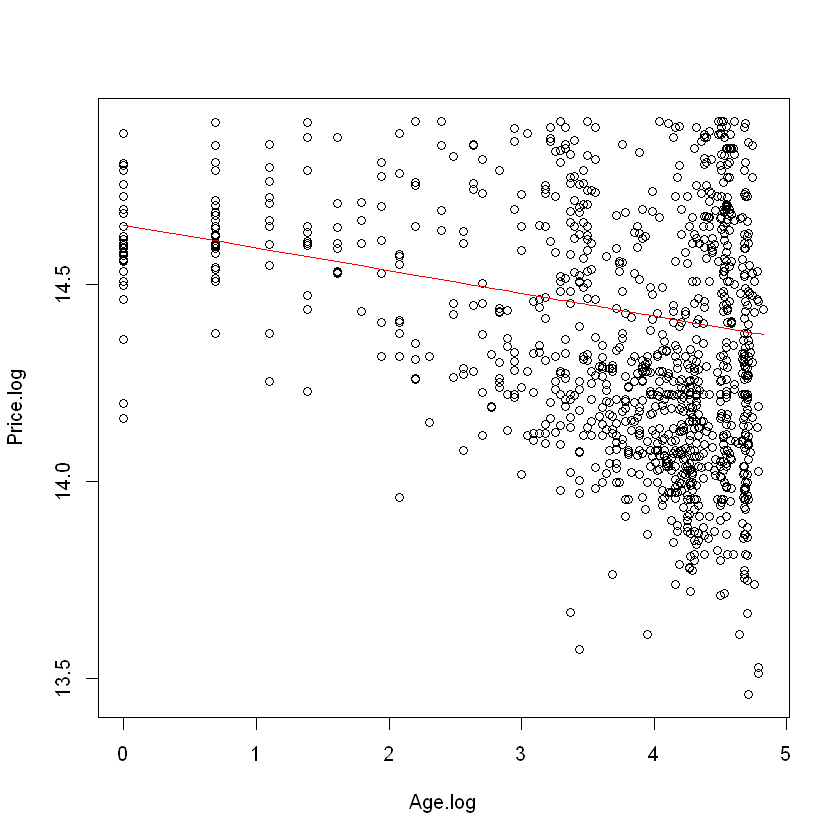

In [24]:
plot(Price.log ~ Age.log, data = mydata.train)
lines(lowess(mydata.train$Age.log, mydata.train$Price.log, delta=100), col="red")

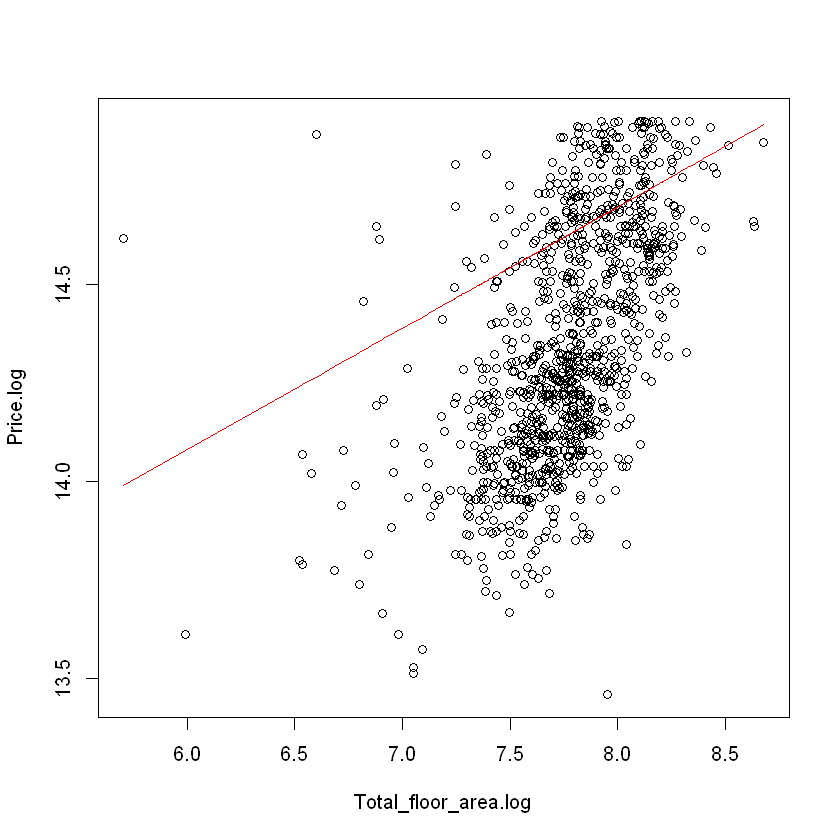

In [25]:
plot(Price.log ~ Total_floor_area.log, data = mydata.train)
lines(lowess(mydata.train$Total_floor_area.log, mydata.train$Price.log, delta=100), col="red")

---
<a id="Other_models"></a>
# Other candidate models (3 marks)

    Candidate Model A

    For the first candidate model, we removed the interaction term, in order to see if there is any improvements on MAE and root MSE. The model A will be named as z1, and as for the result, MAE is almost the same as out final model, however the Root MSE is higher by around 10k units. The pseudo R square is slightly lower as well, thus we consider the candidate model A is worse than final model.

In [26]:
z1 <- lm(Price.log ~ Age.log + Total_floor_area.log, data=mydata.train)


	Shapiro-Wilk normality test

data:  resid.values
W = 0.97369, p-value = 8.246e-13


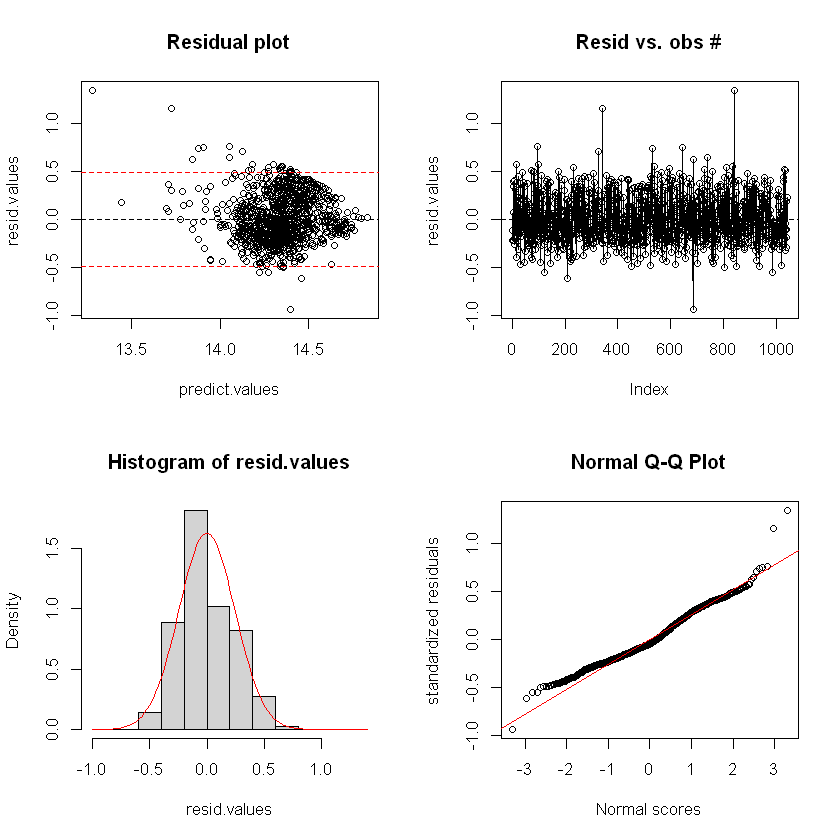

In [27]:
#Check Assumptions
checkresiduals <- function(z.linear) {
  predict.values <- predict(z.linear)
  resid.values <- resid(z.linear)
  
  
  if (max(resid.values) > 3*summary(z.linear)$sigma) {
    ymax <-  max(resid.values)
  } else {
    ymax <-  3*summary(z.linear)$sigma 
  }
  
  if (min(resid.values) < -3*summary(z.linear)$sigma) {
    ymin <-  min(resid.values)
  } else {
    ymin <-  -3*summary(z.linear)$sigma 
  }
  
  
  par(mfrow=c(2,2))
  plot(resid.values ~ predict.values, ylim=c(ymin, ymax), main = "Residual plot")
  abline(0,0, lty=2)
  se <- summary(z.linear)$sigma
  abline(2*se, 0, col="red", lty=2)
  abline(-2*se, 0, col="red", lty=2)
  
  
  plot(resid.values, main = "Resid vs. obs #")
  abline(0,0, lty=2)
  lines(resid.values)
  
    
  hist(resid.values, prob = TRUE)
  curve(dnorm(x, mean = mean(resid.values), sd = sd(resid.values)), col = 'red', add = TRUE)
  
    
  qqnorm(resid.values, ylab= "standardized residuals", xlab = "Normal scores")
  qqline(resid.values, col= "red")
  
  shapiro.test(resid.values)
}

checkresiduals(z1)

In [28]:
#Pseudo r square
predict_z1 <- predict(z1)
SSY.z1 <- sum((mydata.train$Price - mean(mydata.train$Price))^2); SSY.z1
SSE.z1 <- sum((mydata.train$Price - exp(predict_z1))^2); SSE.z1
psr2.z1 <- 1-SSE.z1/SSY.z1; psr2.z1
RSE.z1 <- sqrt(SSE.z1/(nrow(mydata.train)-2-1));RSE.z1

[1] 3.017991e+14

[1] 2.043237e+14

[1] 0.322981

[1] 443457.1

In [29]:
#Check correlation within x variables
vif(z1)

Age.log Total_floor_area.log 
            1.159526             1.159526

In [30]:
#Hypothesis Test
#Test regression
anova(z1)
F.stat <- ((10.36322+21.62059)/2)/0.0602748; F.stat
qf(0.95, 2, 1037) 

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age.log,1,10.36322,10.3632195,171.9329,1.844271e-36
Total_floor_area.log,1,21.62059,21.6205937,358.7004,5.981790e-69
Residuals,1039,62.62552,0.0602748,NA,NA


[1] 265.3166

[1] 3.004403

In [31]:
#Test each variables
summary(z1)


Call:
lm(formula = Price.log ~ Age.log + Total_floor_area.log, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94198 -0.17611 -0.04936  0.17334  1.34044 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          10.55663    0.21835  48.348  < 2e-16 ***
Age.log              -0.03663    0.00711  -5.152 3.08e-07 ***
Total_floor_area.log  0.50519    0.02667  18.939  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2455 on 1039 degrees of freedom
Multiple R-squared:  0.3381,	Adjusted R-squared:  0.3368 
F-statistic: 265.3 on 2 and 1039 DF,  p-value: < 2.2e-16


    - Test of regression
Since the F statistic (265.316600) is higher than F critical value (3.004403), we will reject the null hypothesis, so the regression is significant.


    - Test of each variable
We would reject all 3 variables, since p value for all the variables are all less than 0.05, we reject the H0 and conclude that our variables are all significant.


In [32]:
#Prediction on valid set
mydata.valid$Price.log <- log(mydata.valid$Price)
mydata.valid$Age.log <- log(mydata.valid$Age+1)
mydata.valid$Total_floor_area.log <- log(mydata.valid$Total_floor_area)

predict.z1 <- predict(z1, newdata=mydata.valid)
predict.z1

price.transback1 <- exp(predict.z1); price.transback1

1        2        3        4        5        6        7        8 
14.39259 14.12941 14.51911 14.07603 14.42071 14.21019 14.21225 14.32412 
       9       10       11       12       13       14       15       16 
14.17745 14.49250 14.52526 14.32536 14.30169 14.45370 14.84696 14.40621 
      17       18       19       20       21       22       23       24 
14.32004 14.29684 14.45957 13.80175 14.35965 14.33467 14.49465 14.65999 
      25       26       27       28       29       30       31       32 
14.33684 14.40710 14.15840 14.32908 14.14636 14.30592 13.83892 14.63064 
      33       34       35       36       37       38       39       40 
14.34917 14.37334 14.39423 14.22606 14.42723 14.31441 14.13427 14.24200 
      41       42       43       44       45       46       47       48 
13.82533 14.52172 14.37860 14.23040 14.38945 14.52637 14.28483 14.14894 
      49       50       51       52       53       54       55       56 
14.17952 14.33225 14.33149 14.12449 14.37135 14.36980 14.31357 14.40594 
      57       58       59       60       61       62       63       64 
14.37938 14.09226 14.33056 14.37209 14.35038 14.28476 14.56182 14.22056 
      65       66       67       68       69       70       71       72 
14.20528 14.45973 14.46793 14.26578 14.53947 14.55008 14.60369 14.48204 
      73       74       75       76       77       78       79       80 
14.19887 14.33913 14.57756 14.48069 14.51894 14.40925 14.18770 14.13332 
      81       82       83       84       85       86       87       88 
14.49887 14.10651 14.44218 14.38482 14.21829 14.26017 14.32340 14.17363 
      89       90       91       92       93       94       95       96 
14.09859 14.66462 14.34471 14.30555 14.03907 14.24791 14.32864 14.31472 
      97       98       99      100      101      102      103      104 
14.19593 14.24393 14.30640 14.33830 14.17334 14.25974 14.22717 14.36289 
     105      106      107      108      109      110      111      112 
14.59768 14.39667 14.24362 14.41932 14.26449 14.37244 14.25661 14.44753 
     113      114      115      116      117      118      119      120 
14.25128 14.44639 14.28821 14.08026 14.37186 14.34015 14.21347 14.45754 
     121      122      123      124      125      126      127      128 
14.14370 14.30808 14.35922 14.14727 14.53715 14.31538 14.12409 14.41931 
     129      130      131      132      133      134      135      136 
14.78899 14.33149 14.55827 14.48480 14.24788 14.36402 14.73809 14.09944 
     137      138      139      140      141      142      143      144 
14.37505 14.38100 14.35343 14.36880 14.50834 14.32654 14.77982 14.35935 
     145      146      147      148      149      150      151      152 
14.41030 14.36537 14.19605 14.35632 14.56019 14.11130 14.11228 14.29783 
     153      154      155      156      157      158      159      160 
14.31489 14.56705 13.86013 14.41295 14.49622 14.28394 14.55337 14.35459 
     161      162      163      164      165      166      167      168 
14.28575 14.18135 14.34889 14.36792 14.18902 14.34356 14.11759 14.35858 
     169      170      171      172      173      174      175      176 
14.32219 14.31502 14.35169 14.46447 14.32255 14.30217 14.23095 14.64660 
     177      178      179      180      181      182      183      184 
14.48350 14.46688 14.09908 14.31608 14.35203 14.20145 14.52241 14.40254 
     185      186      187      188      189      190      191      192 
14.42055 14.35858 14.55010 14.65435 14.37992 14.68467 14.32984 14.51009 
     193      194      195      196      197      198      199      200 
14.61501 14.44009 14.37327 14.64023 14.16993 14.57163 14.51599 14.41523 
     201      202      203      204      205      206      207      208 
14.29007 14.13993 14.08662 14.38085 14.46431 14.59228 14.29609 14.39120 
     209      210      211      212      213      214      215      216 
14.25582 14.27994 14.21811 14.33576 14.38917 14.37287 14.15927 14.11723 
     217      218      219      220      221      222      223   

1         2         3         4         5         6         7         8 
1780829.9 1368758.5 2021021.2 1297599.5 1831612.2 1483901.7 1486973.7 1662968.8 
        9        10        11        12        13        14        15        16 
1436108.1 1967952.0 2033476.1 1665033.7 1626098.7 1893056.9 2805130.2 1805258.9 
       17        18        19        20        21        22        23        24 
1656202.0 1618222.6 1904190.3  986338.2 1723116.5 1680615.9 1972170.5 2326772.1 
       25        26        27        28        29        30        31        32 
1684260.5 1806856.1 1409015.5 1671245.7 1392156.3 1632982.1 1023682.2 2259469.8 
       33        34        35        36        37        38        39        40 
1705162.5 1746881.5 1783757.8 1507638.7 1843601.4 1646915.6 1375424.7 1531864.5 
       41        42        43        44        45        46        47        48 
1009865.4 2026305.8 1756088.9 1514197.8 1775249.7 2035734.2 1598900.9 1395745.1 
       49        50        51        52        53        54        55        56 
1439082.6 1676557.5 1675272.1 1362032.6 1743395.3 1740709.7 1645529.9 1804768.0 
       57        58        59        60        61        62        63        64 
1757452.0 1318836.9 1673713.9 1744689.3 1707218.2 1598790.9 2109202.7 1499369.4 
       65        66        67        68        69        70        71        72 
1476641.1 1904499.5 1920172.9 1568732.2 2062575.8 2084591.2 2199389.7 1947457.2 
       73        74        75        76        77        78        79        80 
1467201.0 1688123.7 2142673.7 1944837.2 2020677.5 1810749.7 1450902.3 1374110.8 
       81        82        83        84        85        86        87        88 
1980514.5 1337767.0 1871360.6 1767039.8 1495970.3 1559959.3 1661774.4 1430637.8 
       89        90        91        92        93        94        95        96 
1327216.6 2337563.7 1697572.9 1632383.7 1250521.5 1540945.3 1670510.1 1647421.0 
       97        98        99       100       101       102       103       104 
1462900.9 1534828.9 1633763.1 1686732.7 1430216.4 1559282.4 1509324.6 1728718.2 
      105       106       107       108       109       110       111       112 
2186199.3 1788114.5 1534353.3 1829077.3 1566705.1 1745298.5 1554409.8 1881405.8 
      113       114       115       116       117       118       119       120 
1546158.4 1879256.3 1604322.4 1303099.2 1744287.8 1689854.8 1488777.1 1900337.6 
      121       122       123       124       125       126       127       128 
1388456.6 1636516.5 1722392.6 1393418.8 2057807.7 1648509.8 1361488.7 1829058.6 
      129       130       131       132       133       134       135       136 
2647147.7 1675272.1 2101732.1 1952850.6 1540906.3 1730676.1 2515775.9 1328339.9 
      137       138       139       140       141       142       143       144 
1749871.8 1760302.0 1712448.0 1738972.0 1999374.1 1667006.5 2622983.3 1722613.1 
      145       146       147       148       149       150       151       152 
1812646.2 1733002.0 1463079.4 1717395.9 2105766.2 1344182.1 1345502.4 1619825.3 
      153       154       155       156       157       158       159       160 
1647699.7 2120252.2 1045628.0 1817463.4 1975286.6 1597476.7 2091460.0 1714434.2 
      161       162       163       164       165       166       167       168 
1600380.3 1441729.0 1704685.6 1737437.7 1452818.2 1695617.6 1352670.1 1721277.2 
      169       170       171       172       173       174       175       176 
1659778.5 1647906.1 1709463.8 1913542.8 1660366.3 1626874.1 1515031.6 2295825.6 
      177       178       179       180       181       182       183       184 
1950305.3 1918161.7 1327860.7 1649667.9 1710049.2 1471002.6 2027691.5 1798633.6 
      185       186       187       188       189       190       191       192 
1831322.7 1721285.6 2084623.8 2313684.0 1758407.7 2384903.2 1672512.7 2002876.6 
      193       194       195       196       197       198       199       200 
2224430.6 1867452.8 1746747.1 2281237.1

In [33]:
mydata.valid3 <- as.data.frame(cbind(mydata.valid, price.transback1))
head(mydata.valid3)

mydata.valid3$errors.z1 <- mydata.valid3$Price - mydata.valid3$price.transback1


RMSE.z1 <- sqrt(sum(mydata.valid3$errors.z1^2)/nrow(mydata.valid3)); RMSE.z1
MAE.z1 <- sum(abs(mydata.valid3$errors.z1))/nrow(mydata.valid3); MAE.z1

,Number,Address,List.Date,Price,Days_on_market,Total_floor_area,Year_Built,Age,Lot_Size,Price.log,Lot_Size.log,Age.log,Total_floor_area.log,price.transback1
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1043,3432 E 23RD AVENUE,6/11/2019,1314000,43,2650,1966,53,3960,14.08859,8.283999,3.988984,7.882315,1780830
2,1044,3379 W 23RD AVENUE,9/11/2019,2175000,14,1636,1928,91,4026,14.59254,8.300529,4.521789,7.400010,1368758
3,1045,5597 INVERNESS STREET,3/4/2019,1950000,145,2964,2012,7,4125,14.48334,8.324821,2.079442,7.994295,2021021
4,1046,3427 MONS DRIVE,11/6/2019,1210000,1,1446,1948,71,4510,14.00613,8.414052,4.276666,7.276556,1297599
5,1047,3492 E 49TH AVENUE,3/12/2020,1360000,47,2782,1972,48,4845,14.12300,8.485703,3.891820,7.930925,1831612
6,1048,6282 WINDSOR STREET,12/10/2019,1380000,8,1876,1953,66,4026,14.13759,8.300529,4.204693,7.536897,1483902


[1] 460625.8

[1] 363322.6

    Candidate Model B

    For the second candidate model, we set up the model with interaction, but without logarithm transformation.

    We chose not to use logarithm for this model as we think that although logarithm is useful in certain areas, it does not have a very obvious impact on the results. Thus, we still hoped to try to set up models with the original data. This candidate model B directly measures interaction without transformation. 

    The assumption is similar to the final model as R square and root MSE being similar to what we have for the final model. The vif is still low (where we dropped the interaction term for calculating VIF), indicating that our x variables are not related, which is the same as our candidate model A. MAE and root MSE are still higher than our final model. And the interaction term is not significant. 
    
    Therefore, we can conclude that our final model is the best among all three models.


In [34]:
z2 <- lm(Price ~ Age + Total_floor_area + Age*Total_floor_area, data=mydata.train)


	Shapiro-Wilk normality test

data:  resid.values
W = 0.95034, p-value < 2.2e-16


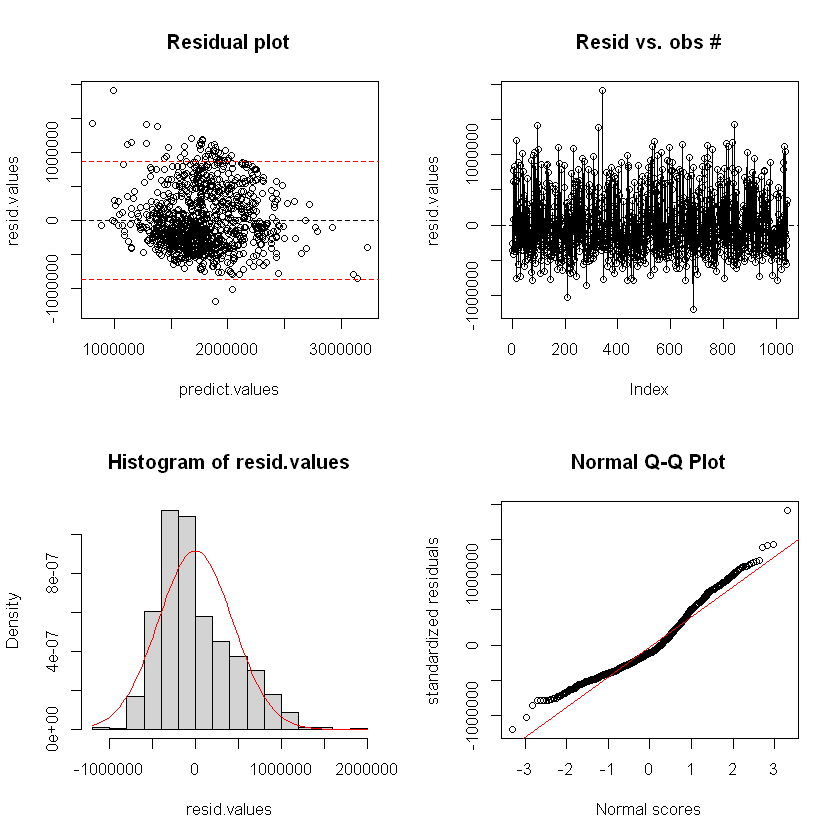

In [35]:
#Residual assumption check

checkresiduals <- function(z.linear) {
  predict.values <- predict(z.linear)
  resid.values <- resid(z.linear)
  
  
  if (max(resid.values) > 3*summary(z.linear)$sigma) {
    ymax <-  max(resid.values)
  } else {
    ymax <-  3*summary(z.linear)$sigma 
  }
  
  if (min(resid.values) < -3*summary(z.linear)$sigma) {
    ymin <-  min(resid.values)
  } else {
    ymin <-  -3*summary(z.linear)$sigma 
  }
  
  
  par(mfrow=c(2,2))
  plot(resid.values ~ predict.values, ylim=c(ymin, ymax), main = "Residual plot")
  abline(0,0, lty=2)
  se <- summary(z.linear)$sigma
  abline(2*se, 0, col="red", lty=2)
  abline(-2*se, 0, col="red", lty=2)
  
  
  plot(resid.values, main = "Resid vs. obs #")
  abline(0,0, lty=2)
  lines(resid.values)
  
    
  hist(resid.values, prob = TRUE)
  curve(dnorm(x, mean = mean(resid.values), sd = sd(resid.values)), col = 'red', add = TRUE)
  
    
  qqnorm(resid.values, ylab= "standardized residuals", xlab = "Normal scores")
  qqline(resid.values, col= "red")
  
  shapiro.test(resid.values)
}

checkresiduals(z2)

In [36]:
#r square=0.34，还算ok
summary(z2)


Call:
lm(formula = Price ~ Age + Total_floor_area + Age * Total_floor_area, 
    data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1194606  -309057  -108085   265659  1910017 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           7.618e+05  1.102e+05   6.913 8.26e-12 ***
Age                  -1.069e+03  1.509e+03  -0.709    0.479    
Total_floor_area      4.333e+02  3.801e+01  11.399  < 2e-16 ***
Age:Total_floor_area  6.665e-02  5.409e-01   0.123    0.902    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 436300 on 1038 degrees of freedom
Multiple R-squared:  0.3453,	Adjusted R-squared:  0.3434 
F-statistic: 182.5 on 3 and 1038 DF,  p-value: < 2.2e-16


In [37]:
#Check correlation within x variables
z3 <- lm(Price ~ Age + Total_floor_area, data=mydata.train)
vif(z3)

Age Total_floor_area 
        1.111506         1.111506

In [38]:
#Interaction test
drop1(z2, test="F")

#p value>p critical, can not reject, interaction term is not significant

#Testing regression
anova(z)
F.stat <- ((10.36322+21.62059)/2)/0.0602748; F.stat
qf(0.95, 2, 1037) 

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,1.975994e+14,27067.04,NA,NA
Age:Total_floor_area,1,2890957218,1.976023e+14,27065.05,0.01518635,0.9019465


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Age.log,1,10.36321955,10.36321955,171.8783385,1.898866e-36
Total_floor_area.log,1,21.62059371,21.62059371,358.5866059,6.367571e-69
Age.log:Total_floor_area.log,1,0.04042561,0.04042561,0.6704757,4.130737e-01
Residuals,1038,62.58509354,0.06029392,NA,NA


[1] 265.3166

[1] 3.004403

In [39]:
#Prediction on valid set
predict.z2 <- predict(z2, newdata=mydata.valid)
predict.z2

mydata.valid4 <- as.data.frame(cbind(mydata.valid, predict.z2))
head(mydata.valid4)

mydata.valid4$errors.z2 <- mydata.valid4$Price - mydata.valid4$predict.z2


RMSE.z2 <- sqrt(sum(mydata.valid4$errors.z2^2)/nrow(mydata.valid4)); RMSE.z2
MAE.z2 <- sum(abs(mydata.valid4$errors.z2))/nrow(mydata.valid4); MAE.z2

#RMSE AND MAE are too large.

1       2       3       4       5       6       7       8       9      10 
1862659 1383246 2039919 1319231 1924737 1512295 1510468 1721037 1459680 2097452 
     11      12      13      14      15      16      17      18      19      20 
2065943 1724079 1676079 1781246 3565659 1892828 1681929 1660951 1957352 1026174 
     21      22      23      24      25      26      27      28      29      30 
1761046 1721566 1899520 2221497 1698392 1908718 1430009 1727928 1415469 1679467 
     31      32      33      34      35      36      37      38      39      40 
1067542 2282249 1705176 1828525 1861054 1538426 1961002 1697851 1383812 1562441 
     41      42      43      44      45      46      47      48      49      50 
1047394 2232498 1786510 1535848 1848447 1882244 1619669 1418717 1462673 1738149 
     51      52      53      54      55      56      57      58      59      60 
1736179 1383969 1705561 1821180 1695339 1735207 1843257 1332282 1723692 1826496 
     61      62      63      64      65      66      67      68      69      70 
1770864 1638729 1963699 1519708 1475249 2049259 2042577 1602176 2266841 1995749 
     71      72      73      74      75      76      77      78      79      80 
2424044 2039884 1494348 1702736 2318332 2101279 2211685 1908397 1464640 1395529 
     81      82      83      84      85      86      87      88      89      90 
2154416 1358032 1943313 1844335 1525627 1597427 1626999 1453147 1346895 2234928 
     91      92      93      94      95      96      97      98      99     100 
1763325 1683806 1274554 1575877 1708550 1702222 1483151 1561118 1684695 1749733 
    101     102     103     104     105     106     107     108     109     110 
1448196 1596445 1540262 1804295 2389358 1777851 1567624 1925559 1600018 1821404 
    111     112     113     114     115     116     117     118     119     120 
1541585 1991953 1561451 2010155 1648565 1322067 1815510 1753420 1517143 2012024 
    121     122     123     124     125     126     127     128     129     130 
1395842 1688155 1780904 1415154 2142802 1701532 1307054 1940327 2843163 1736179 
    131     132     133     134     135     136     137     138     139     140 
2284794 2115975 1575620 1808019 2673334 1351608 1817448 1846587 1777823 1816784 
    141     142     143     144     145     146     147     148     149     150 
1897814 1710879 2764165 1796909 1869362 1799439 1488456 1789317 2351173 1349138 
    151     152     153     154     155     156     157     158     159     160 
1351504 1662681 1691509 2288786 1097778 1656942 1992630 1636284 1943769 1778792 
    161     162     163     164     165     166     167     168     169     170 
1640922 1454002 1773360 1778011 1478893 1728855 1373544 1788341 1717112 1702139 
    171     172     173     174     175     176     177     178     179     180 
1778727 2025973 1713229 1674597 1545627 2255752 2113455 1970831 1347863 1702148 
    181     182     183     184     185     186     187     188     189     190 
1781049 1491879 2113294 1854109 1927752 1752912 2057710 2380695 1798964 2372754 
    191     192     193     194     195     196     197     198     199     200 
1732819 1977503 2097147 1876746 1814365 2607739 1442923 2345879 2042083 1927596 
    201     202     203     204     205     206     207     208     209     210 
1652039 1397585 1335618 1808828 2058927 2398204 1664540 1856626 1586948 1631652 
    211     212     213     214     215     216     217     218     219     220 
1521198 1727092 1845878 1828281 1428360 1372491 1413275 1712760 1610469 1413275 
    221     222     223     224     225     226     227     228     229     230 
1714475 1583732 1758362 1466252 1748809 1477505 1832106 2203299 1496682 1552749 
    231     232     233     234     235     236     237     238     239     240 
1875312 1794410 1793627 1500620 1552188 1858367 1596445 1724410 1430087 1522516 
    241     242     243     244     245     246     247     248     249     250 
2461669 1791012 1798456 1777045 24394

,Number,Address,List.Date,Price,Days_on_market,Total_floor_area,Year_Built,Age,Lot_Size,Price.log,Lot_Size.log,Age.log,Total_floor_area.log,predict.z2
,<int>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1043,3432 E 23RD AVENUE,6/11/2019,1314000,43,2650,1966,53,3960,14.08859,8.283999,3.988984,7.882315,1862659
2,1044,3379 W 23RD AVENUE,9/11/2019,2175000,14,1636,1928,91,4026,14.59254,8.300529,4.521789,7.400010,1383246
3,1045,5597 INVERNESS STREET,3/4/2019,1950000,145,2964,2012,7,4125,14.48334,8.324821,2.079442,7.994295,2039919
4,1046,3427 MONS DRIVE,11/6/2019,1210000,1,1446,1948,71,4510,14.00613,8.414052,4.276666,7.276556,1319231
5,1047,3492 E 49TH AVENUE,3/12/2020,1360000,47,2782,1972,48,4845,14.12300,8.485703,3.891820,7.930925,1924737
6,1048,6282 WINDSOR STREET,12/10/2019,1380000,8,1876,1953,66,4026,14.13759,8.300529,4.204693,7.536897,1512295


[1] 461816.5

[1] 375072.2